In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import dill
from tqdm import tqdm
import sys
import os
import gc

# Get the current working directory
current_dir = os.getcwd()
# Add the parent directory to sys.path
sys.path.append(os.path.dirname(current_dir))

In [2]:
from analyze.report import draw_rate_vs_angle_pop, draw_spikes_and_psth_bothside, plot_cf_intervals_grid, plot_tonotopic_heatmaps

/Users/francescodesantis/.pyenv/versions/hear_env/lib/python3.13/site-packages/setuptools/_distutils/_msvccompiler.py:12: UserWarning: _get_vc_env is private; find an alternative (pypa/distutils#340)
  warnings.warn(


In [3]:
# List directory contents
result_dir = '/Users/francescodesantis/Library/CloudStorage/OneDrive-PolitecnicodiMilano/work/sound_localization/sl_results/'
items = os.listdir(result_dir)
for item in items:
    print(item) 


whitenoise_70dB&TanCarney&subject_3.pic
harmonic_69dB&TanCarney&subject_1.pic
whitenoise_70dB&TanCarney&subject_2.pic
tone_0.1kHz_70dB&TanCarney&itd_only_myoga_inv.pic
tone_1.5kHz_70dB&TanCarney&subject_1.pic
whitenoise_70dB&TanCarney&subject_1.pic
tone_1.kHz_70dB&TanCarney&itd_only_no_MSO_inh.pic
whitenoise_70dB&TanCarney&subject_5.pic
vs_data_100_ANFs_4_tones.pkl
tone_10.kHz_70dB&TanCarney&ild_only.pic
tone_0.6kHz_70dB&TanCarney&subject_1.pic
whitenoise_70dB&TanCarney&subject_4.pic
vs_data_15_ANFs_15_tones.pkl
tone_10.kHz_70dB&TanCarney&itd_only.pic
tone_0.3kHz_70dB&TanCarney&subject_1.pic
tone_0.1kHz_70dB&TanCarney&itd_only.pic
tone_0.5kHz_70dB&TanCarney&subject_1.pic
vs_data_8_ANFs_12_tones.pkl
tone_0.1kHz_70dB&TanCarney&ild_only.pic
tone_1.kHz_70dB&TanCarney&subject_1_myoga_inv.pic
tone_1.kHz_70dB&TanCarney&itd_only_myoga_null.pic
tone_1.3kHz_70dB&TanCarney&subject_1.pic
tone_0.8kHz_70dB&TanCarney&subject_1.pic
tone_0.1kHz_70dB&TanCarney&subject_1.pic
tone_10.kHz_70dB&TanCarney&su

In [14]:
pop = 'MSO'
cues = ['itd_only']
sounds = ['tone_1.kHz']
v_maxes = [0.4848006810897435, 0.3031269942565412, 0.43606998654104967, 0.4758801657996739]
v_unique = [0.4848006810897435]

tone_1.kHz 

itd_only 

previously vmax set at  0.27722319889254077
now vmax set at  0.4848006810897435


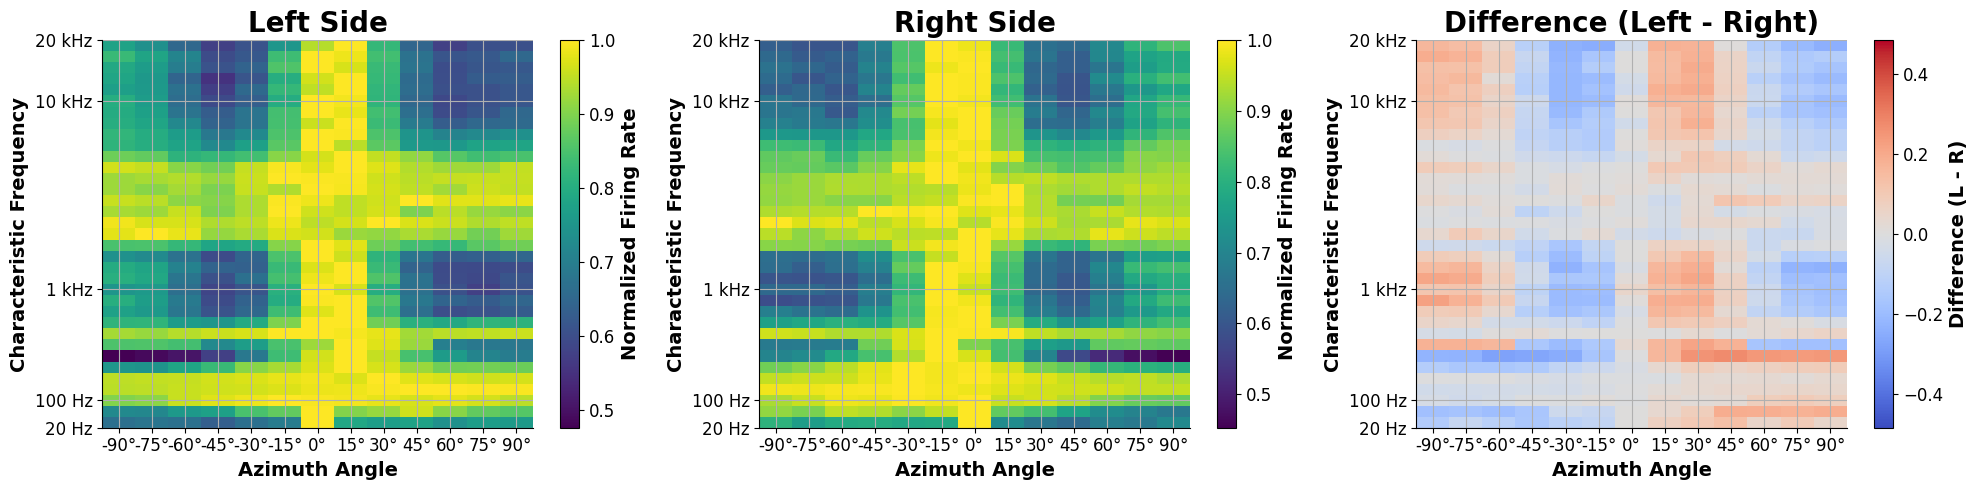

In [15]:
for f, v in zip(sounds, v_unique):
    print(f, '\n')
    for cue in cues:
        print(cue, '\n')
        title = f'{f}_70dB&TanCarney&{cue}.pic'
        result_path = result_dir + title
        with open(result_path, "rb") as file:
            result = dill.load(file, ignore=True)
            
        fig = plot_tonotopic_heatmaps(
            data=result,
            pop=pop,
            num_cells_per_interval=50,
            title=None,
            figsize=(20, 5),
            f_ticks=[100,1000,10000],
            vmax_given=v,
            row_norm=True
        )
        plt.show()
        # Free memory
        del result
        gc.collect()
        # Free memory

In [16]:
pop = 'MSO'
cues = ['subject_1', 'itd_only', 'ild_only']
sounds = ['tone_0.1kHz', 'tone_1.kHz', 'tone_10.kHz', 'whitenoise']
v_maxes = [0.4848006810897435, 0.3031269942565412, 0.43606998654104967, 0.4758801657996739]
v_unique = [0.4848006810897435, 0.4848006810897435, 0.4848006810897435, 0.4848006810897435]

tone_0.1kHz 

subject_1


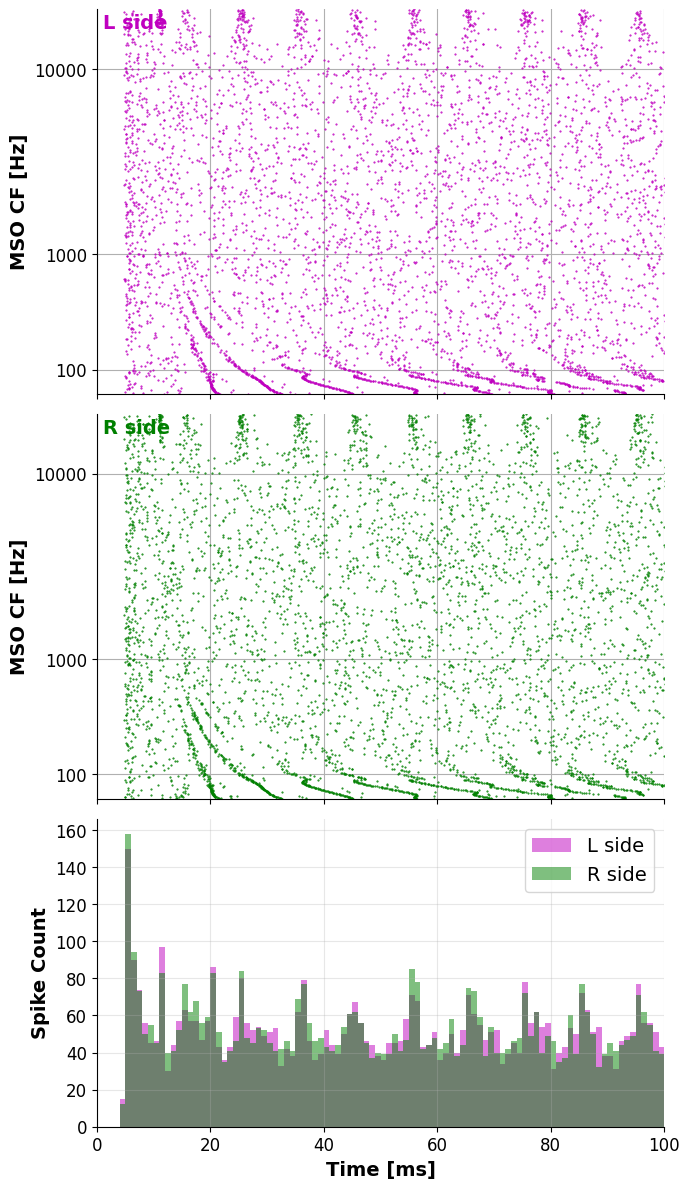

previously vmax set at  13.84


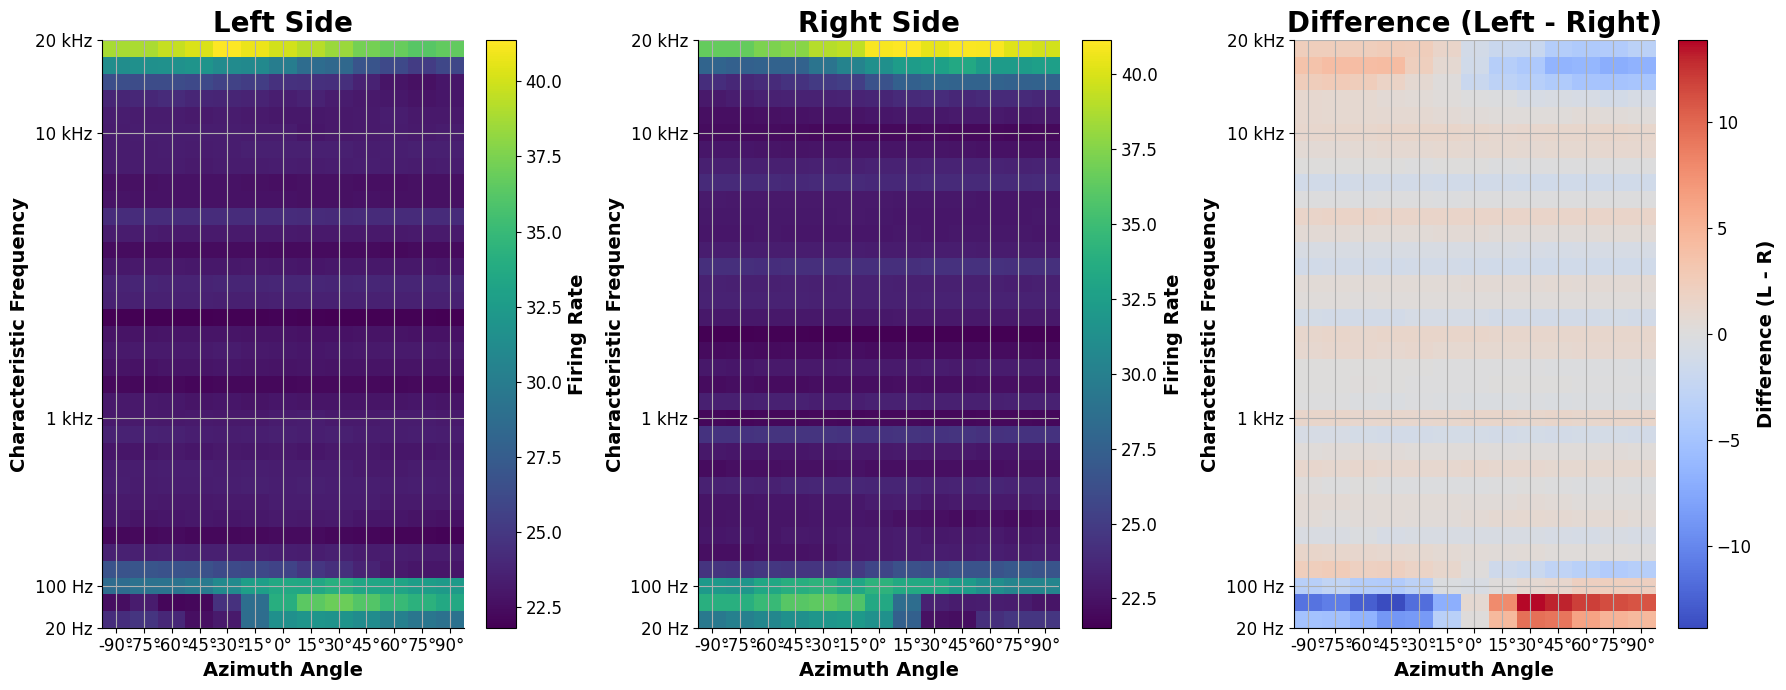

itd_only


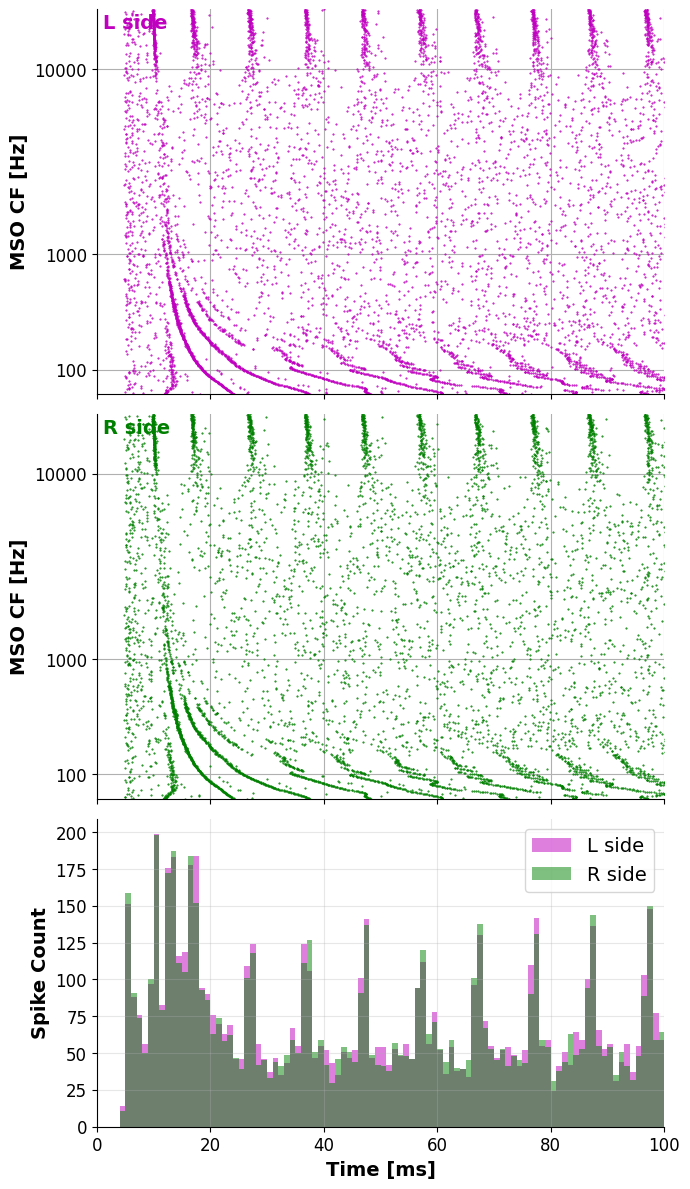

previously vmax set at  34.599999999999994


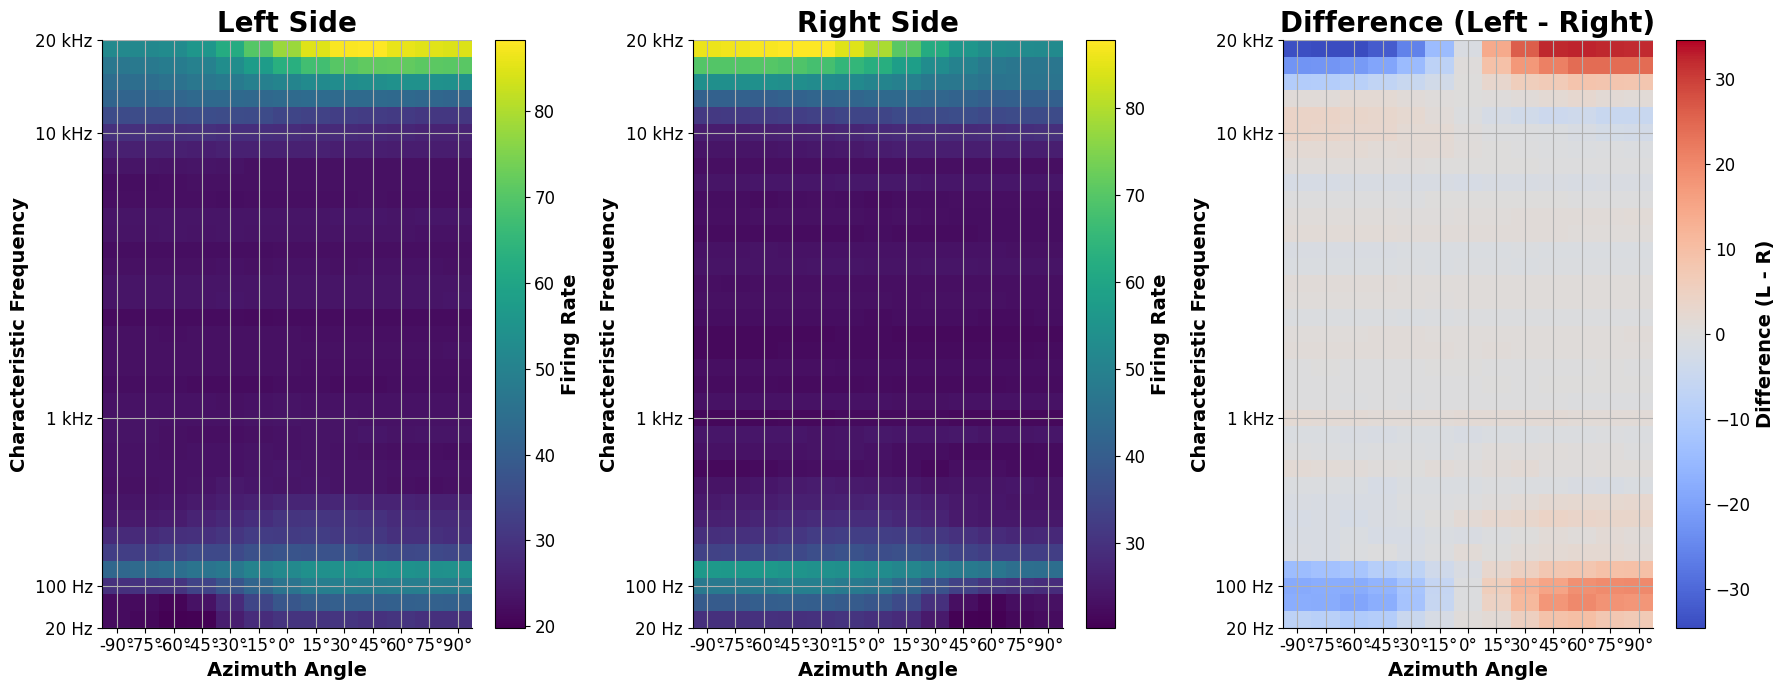

ild_only


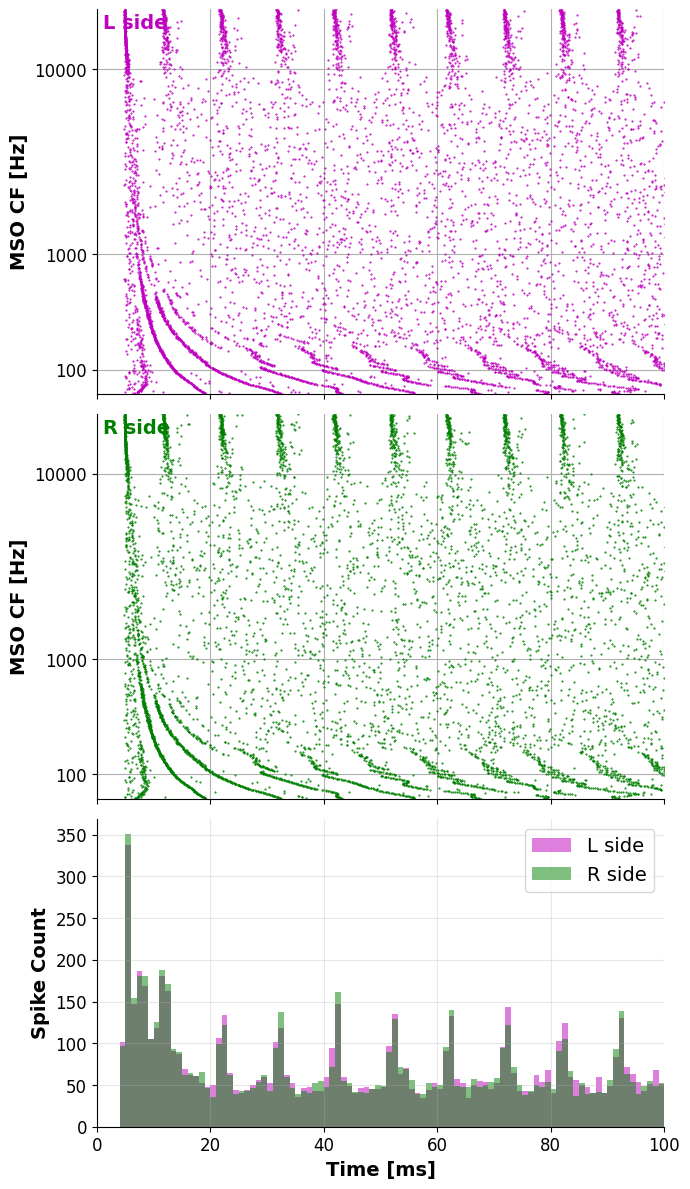

previously vmax set at  2.3599999999999994


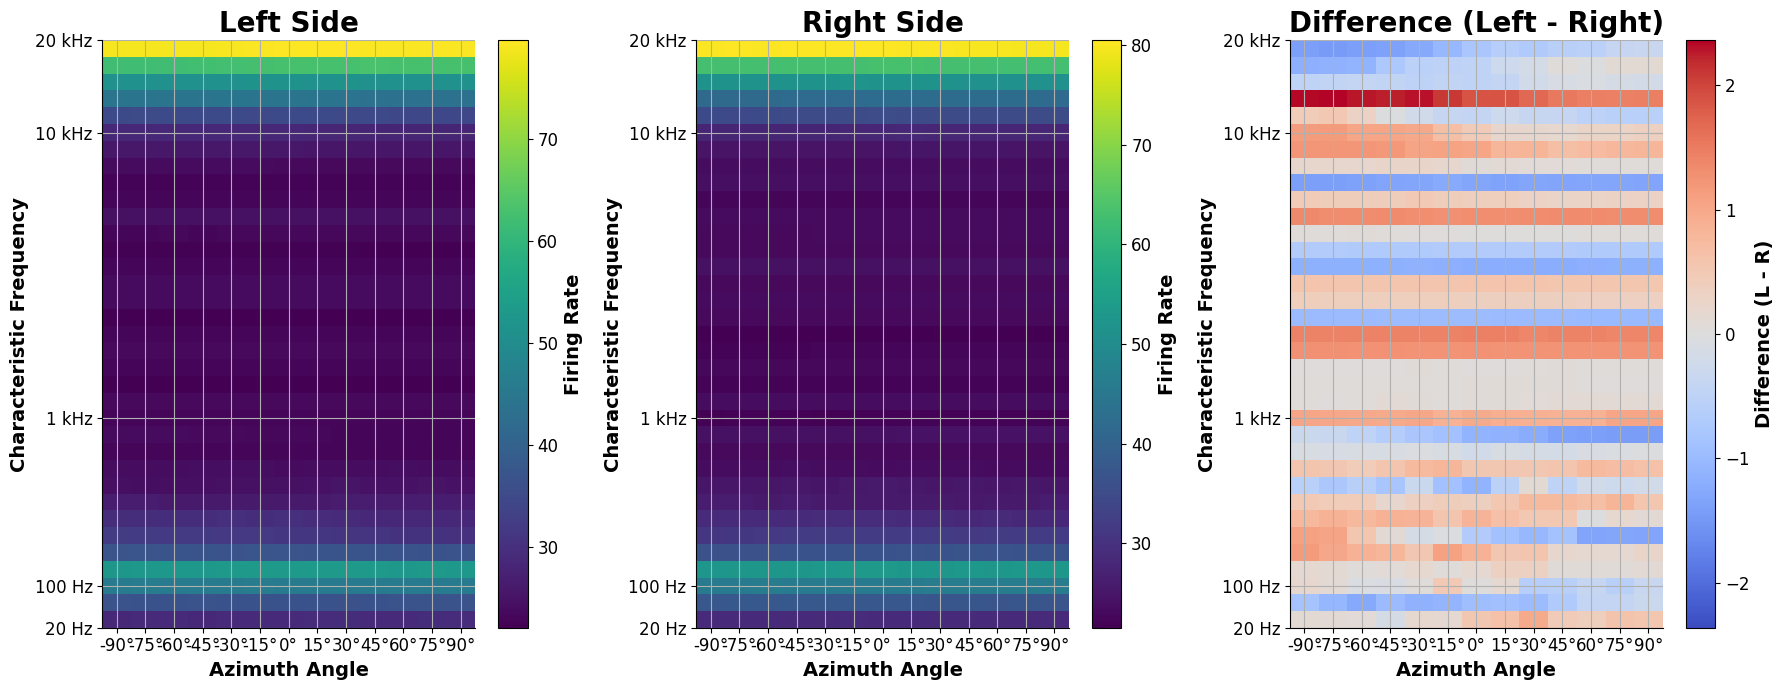

tone_1.kHz 

subject_1


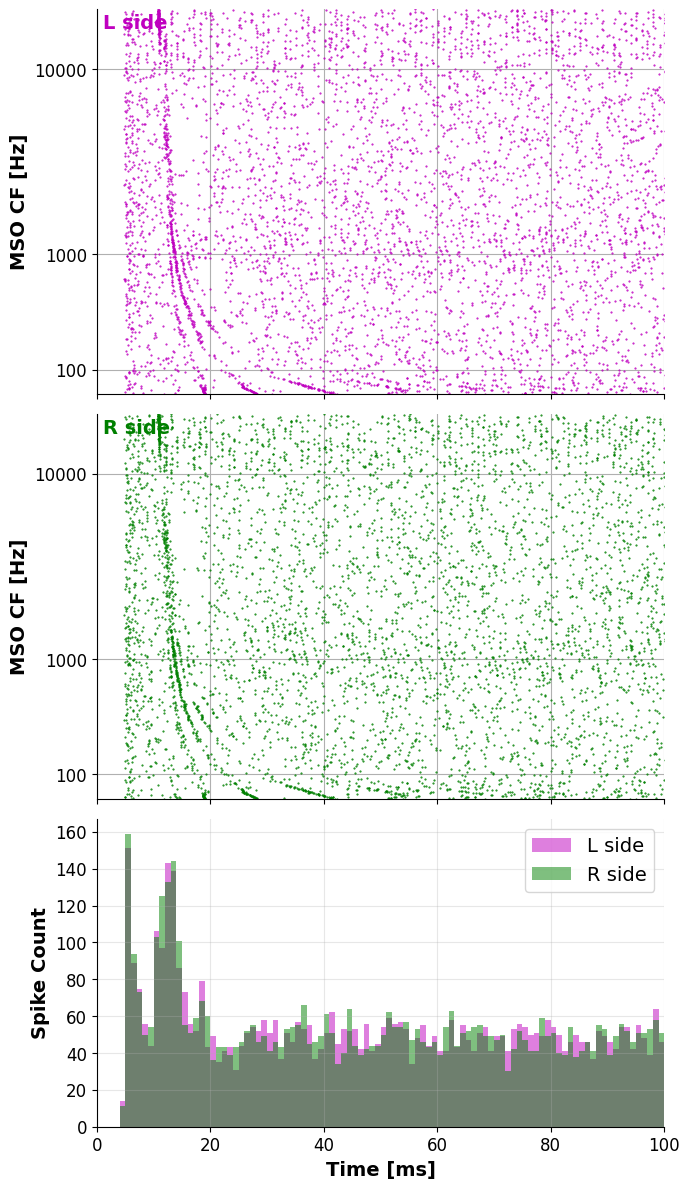

previously vmax set at  9.699999999999996


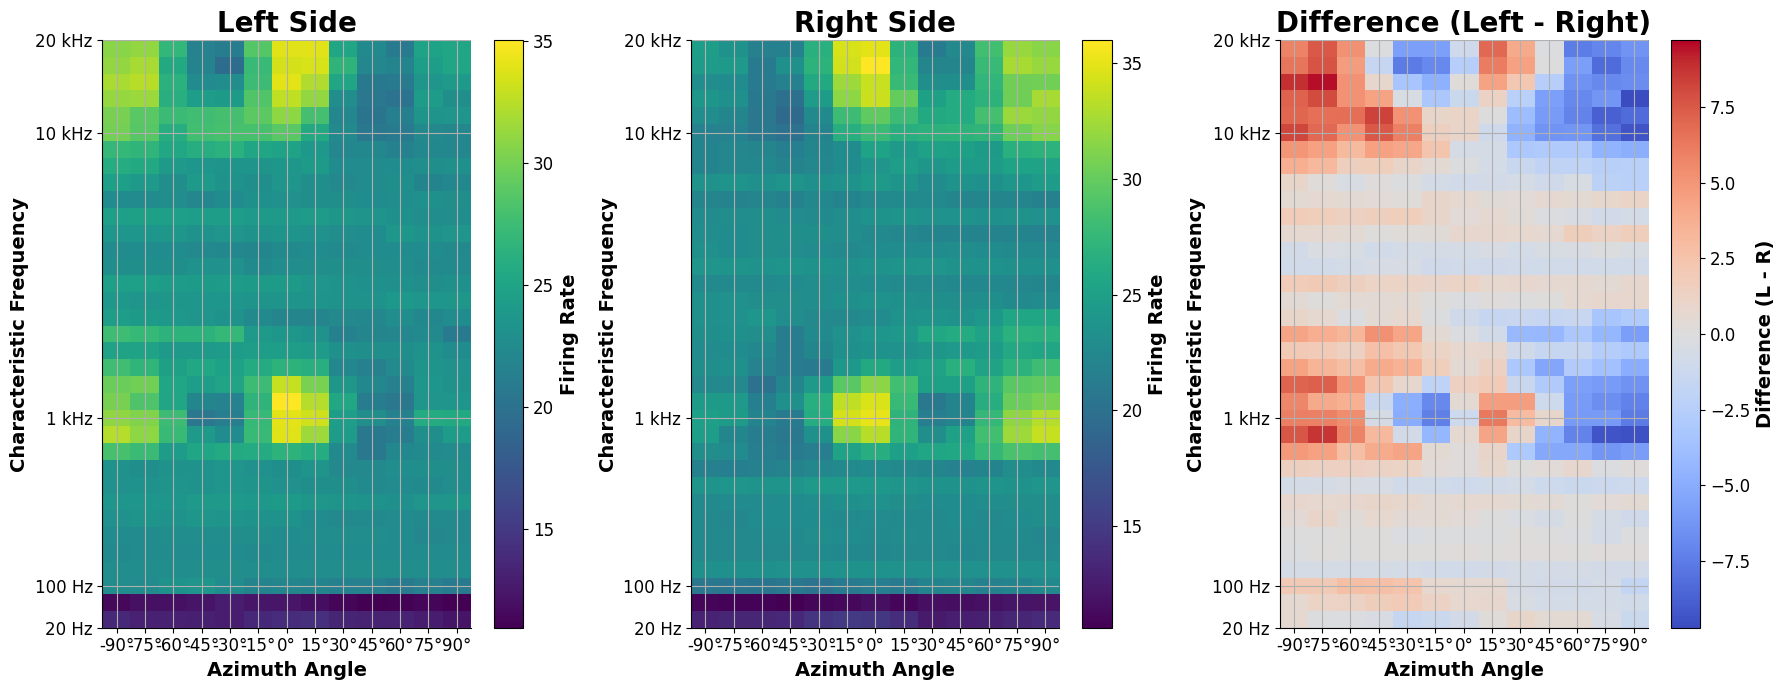

itd_only


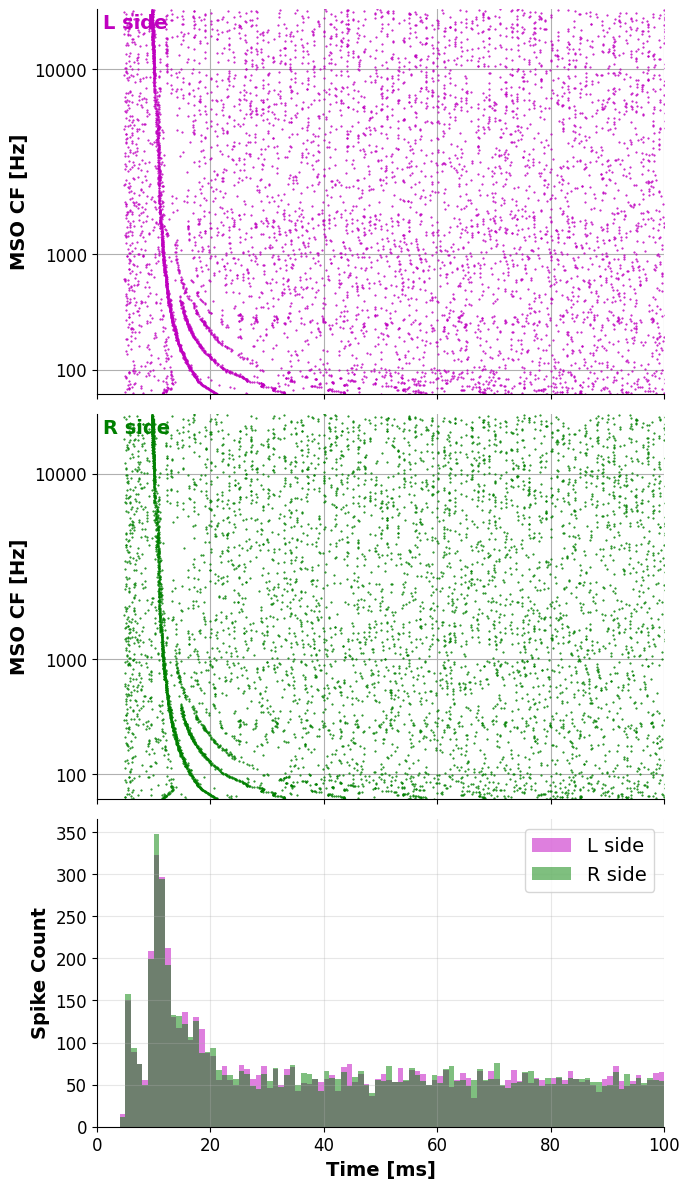

previously vmax set at  14.059999999999999


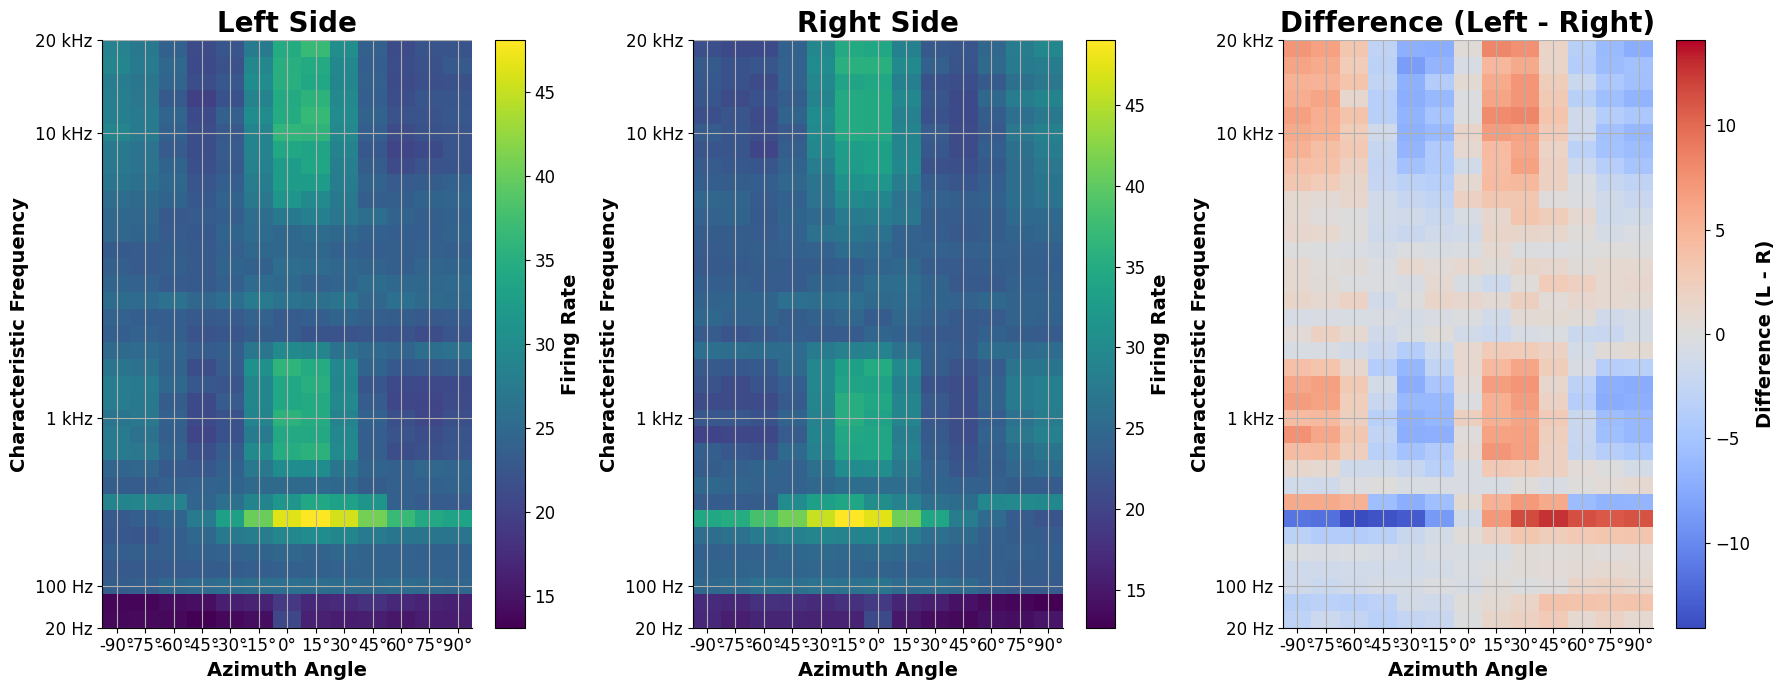

ild_only


In [ ]:
for f in sounds:
    print(f, '\n')
    for cue in cues:
        print(cue)
        title = f'{f}_70dB&TanCarney&{cue}.pic'
        result_path = result_dir + title
        with open(result_path, "rb") as file:
            result = dill.load(file, ignore=True)
             

        draw_spikes_and_psth_bothside(
            res = result,
            angle = 0,
            pop = pop,
            xlim = [0,100]
        )

        fig = plot_tonotopic_heatmaps(
            data=result,
            pop=pop,
            num_cells_per_interval=50,
            title=None,
            f_ticks=[100,1000,10000],
            figsize=(18, 7),
            row_norm=False
        )

        plt.show()
        # Free memory
        del result
        gc.collect()
        # Free memory

whitenoise 

subject_1


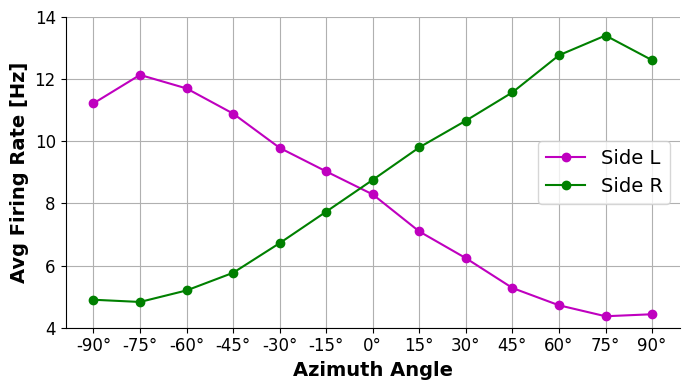

itd_only


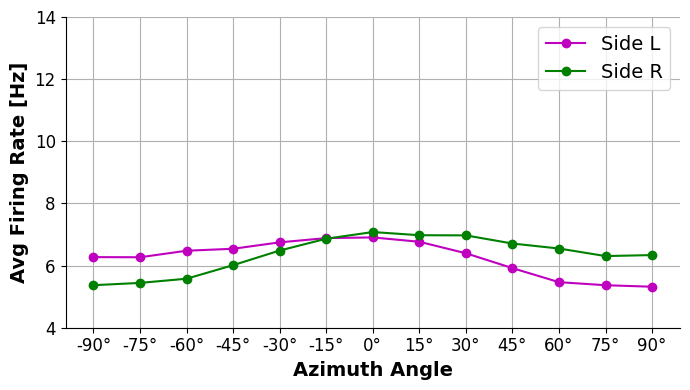

ild_only


In [ ]:
#ylims = [[1500,2950], [1300,2400], [1650,2100], [43000,71000]]
sounds = ['whitenoise']
pop = 'LSO'
ylims = [[4,14]] #[8,17], [14,24], [4,24]]
cf_intervals = [[75,125], [900,1100], [9000,11000], None]
cues = ['subject_1', 'itd_only', 'ild_only']

for f, ylim, cf_interval in zip(sounds, ylims, cf_intervals):
    print(f, '\n')
    for cue in cues:
        print(cue)
        title = f'{f}_70dB&TanCarney&{cue}.pic'
        result_path = result_dir + title
        with open(result_path, "rb") as file:
            result = dill.load(file, ignore=True)

        draw_rate_vs_angle_pop(
            data = result,
            pop = pop,
            rate = True,
            ylim= ylim,
        )

        plt.show()
        # Free memory
        del result
        gc.collect()
        # Free memory  

tone_1.kHz 

subject_1


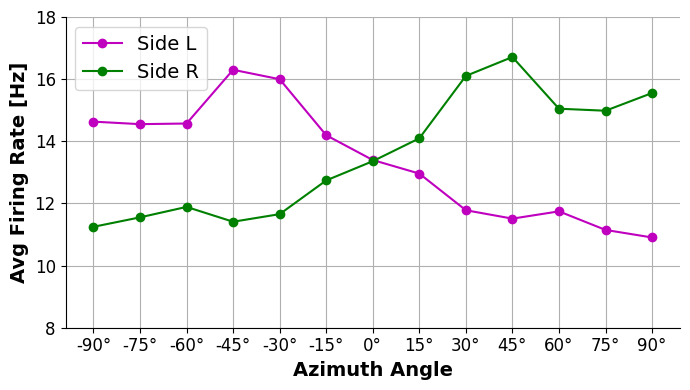

itd_only


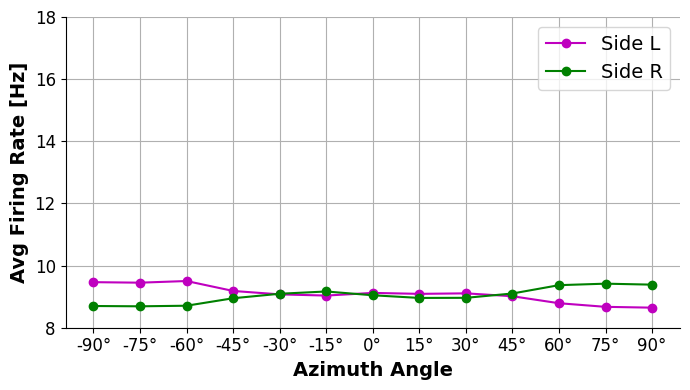

ild_only


KeyboardInterrupt: 

In [ ]:
#ylims = [[1500,2950], [1300,2400], [1650,2100], [43000,71000]]
sounds = ['tone_1.kHz']
pop = 'LSO'
ylims = [[8,18]]#, [14,24], [4,24]]
cf_intervals = [[75,125], [900,1100], [9000,11000], None]
cues = ['subject_1', 'itd_only', 'ild_only']

for f, ylim, cf_interval in zip(sounds, ylims, cf_intervals):
    print(f, '\n')
    for cue in cues:
        print(cue)
        title = f'{f}_70dB&TanCarney&{cue}.pic'
        result_path = result_dir + title
        with open(result_path, "rb") as file:
            result = dill.load(file, ignore=True)

        draw_rate_vs_angle_pop(
            data = result,
            pop = pop,
            rate = True,
            ylim= ylim,
        )

        plt.show()
        # Free memory
        del result
        gc.collect()
        # Free memory  

In [ ]:
#ylims = [[1500,2950], [1300,2400], [1650,2100], [43000,71000]]
sounds = ['tone_10.kHz']
pop = 'LSO'
ylims = [[16,24]] #[8,17], [14,24], [4,24]]
cf_intervals = [[75,125], [900,1100], [9000,11000], None]
cues = ['subject_1', 'itd_only', 'ild_only']

for f, ylim, cf_interval in zip(sounds, ylims, cf_intervals):
    print(f, '\n')
    for cue in cues:
        print(cue)
        title = f'{f}_70dB&TanCarney&{cue}.pic'
        result_path = result_dir + title
        with open(result_path, "rb") as file:
            result = dill.load(file, ignore=True)

        draw_rate_vs_angle_pop(
            data = result,
            pop = pop,
            rate = True,
            #ylim= ylim,
        )

        plt.show()
        # Free memory
        del result
        gc.collect()
        # Free memory  

tone_0.1kHz 

subject_1


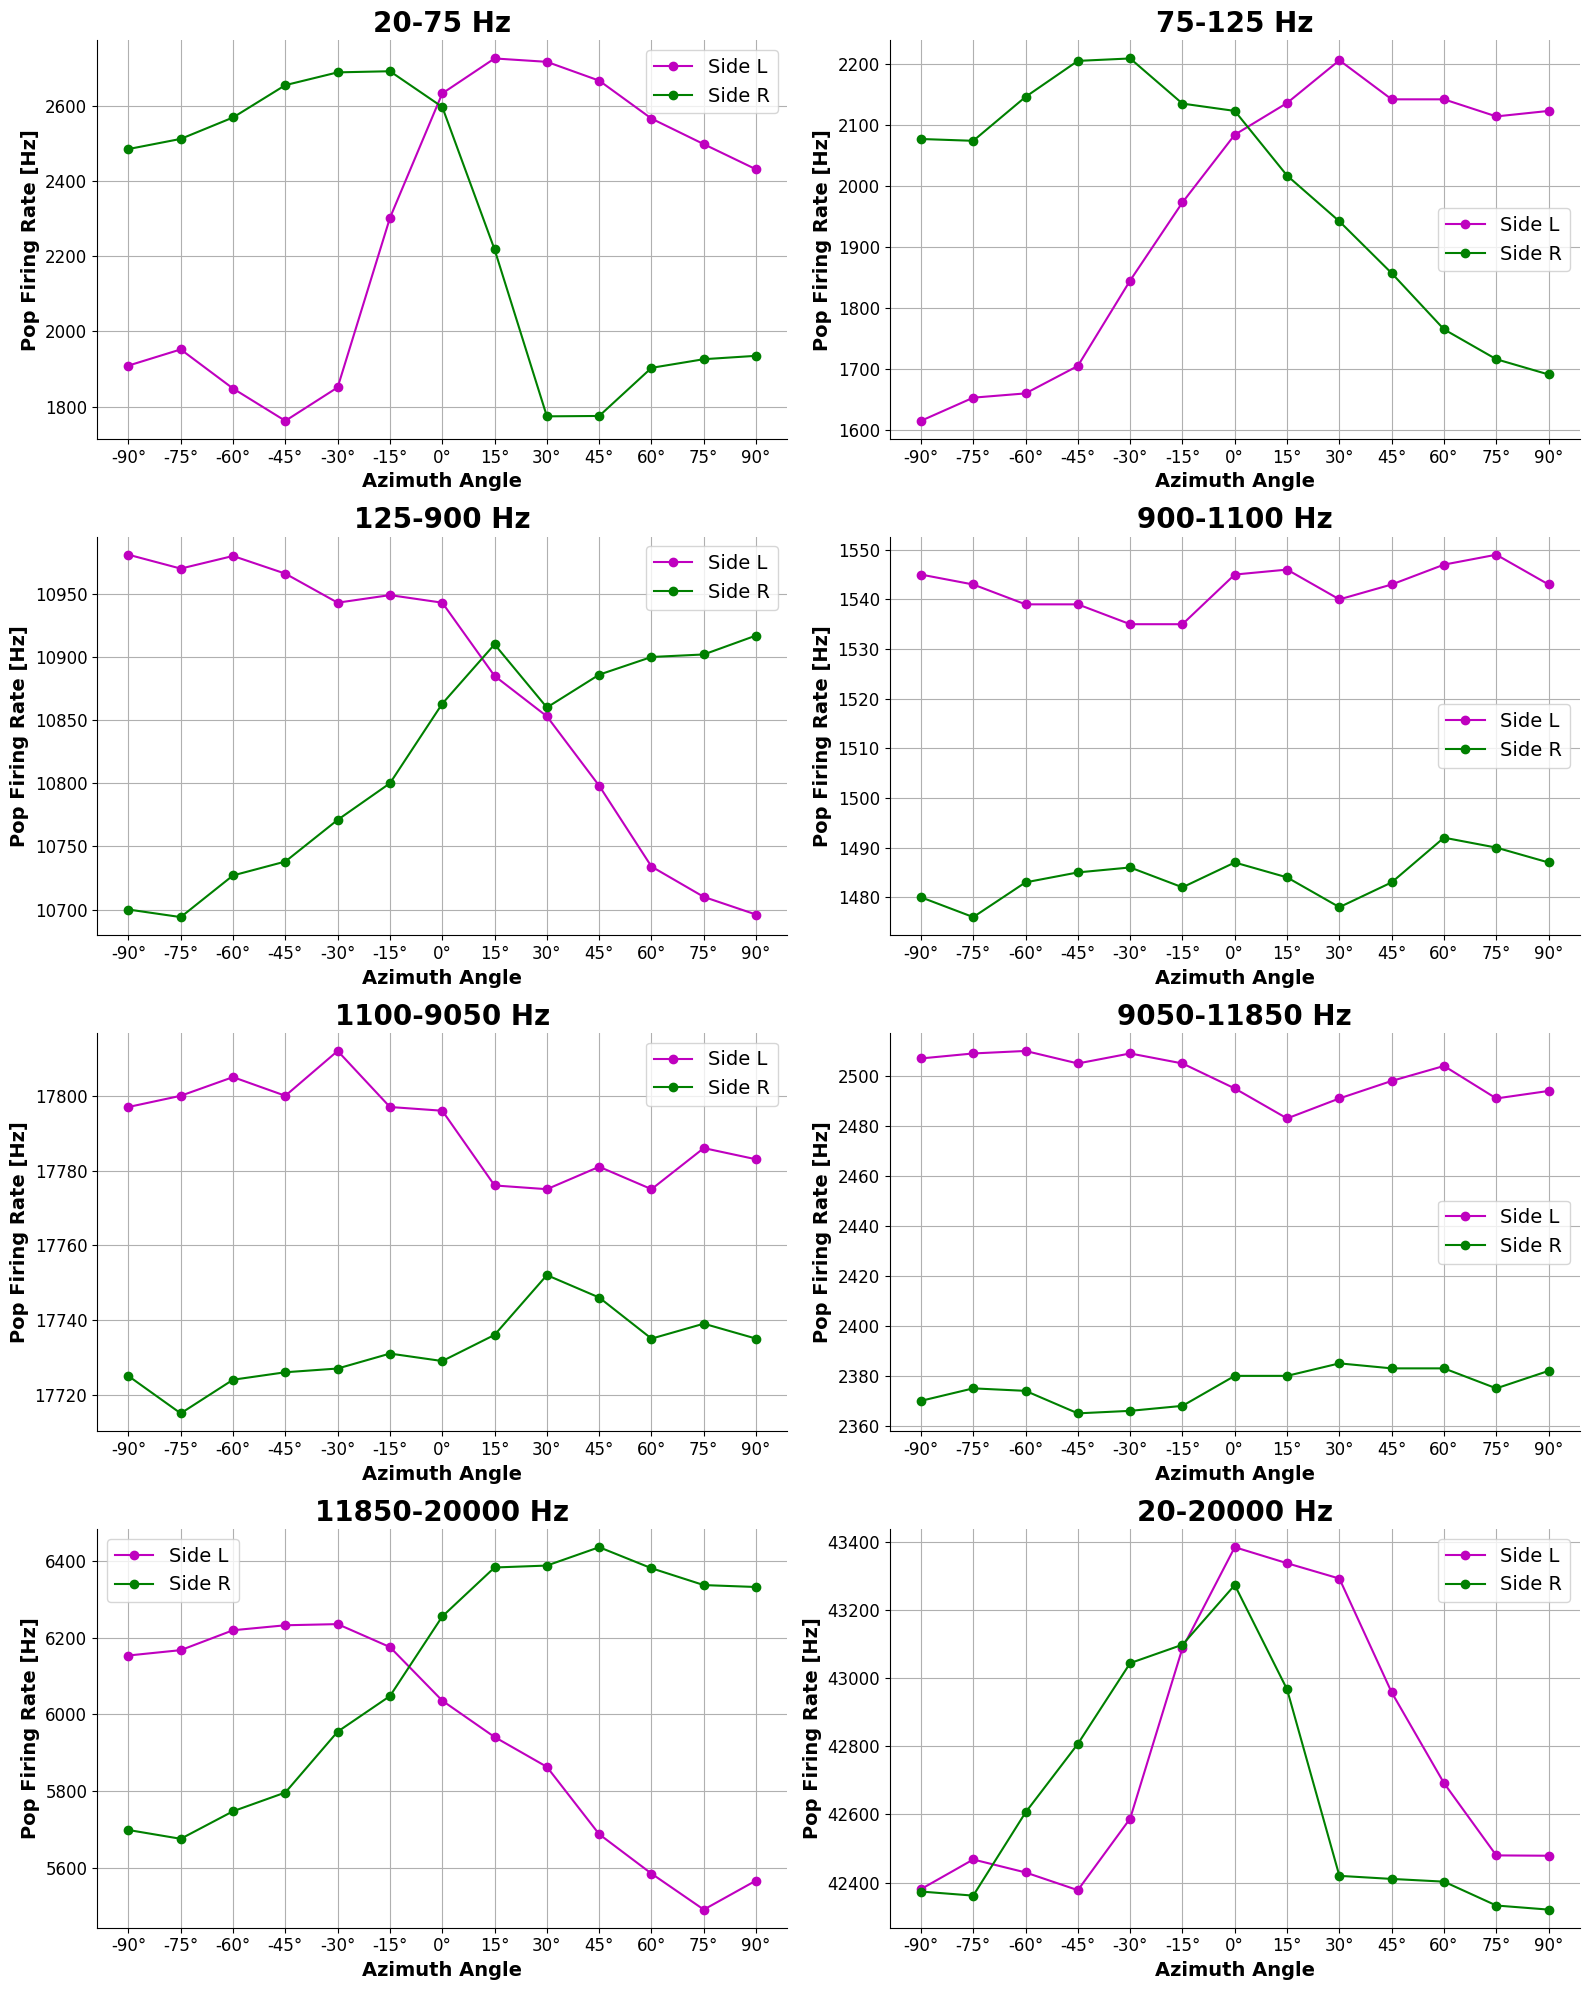

itd_only


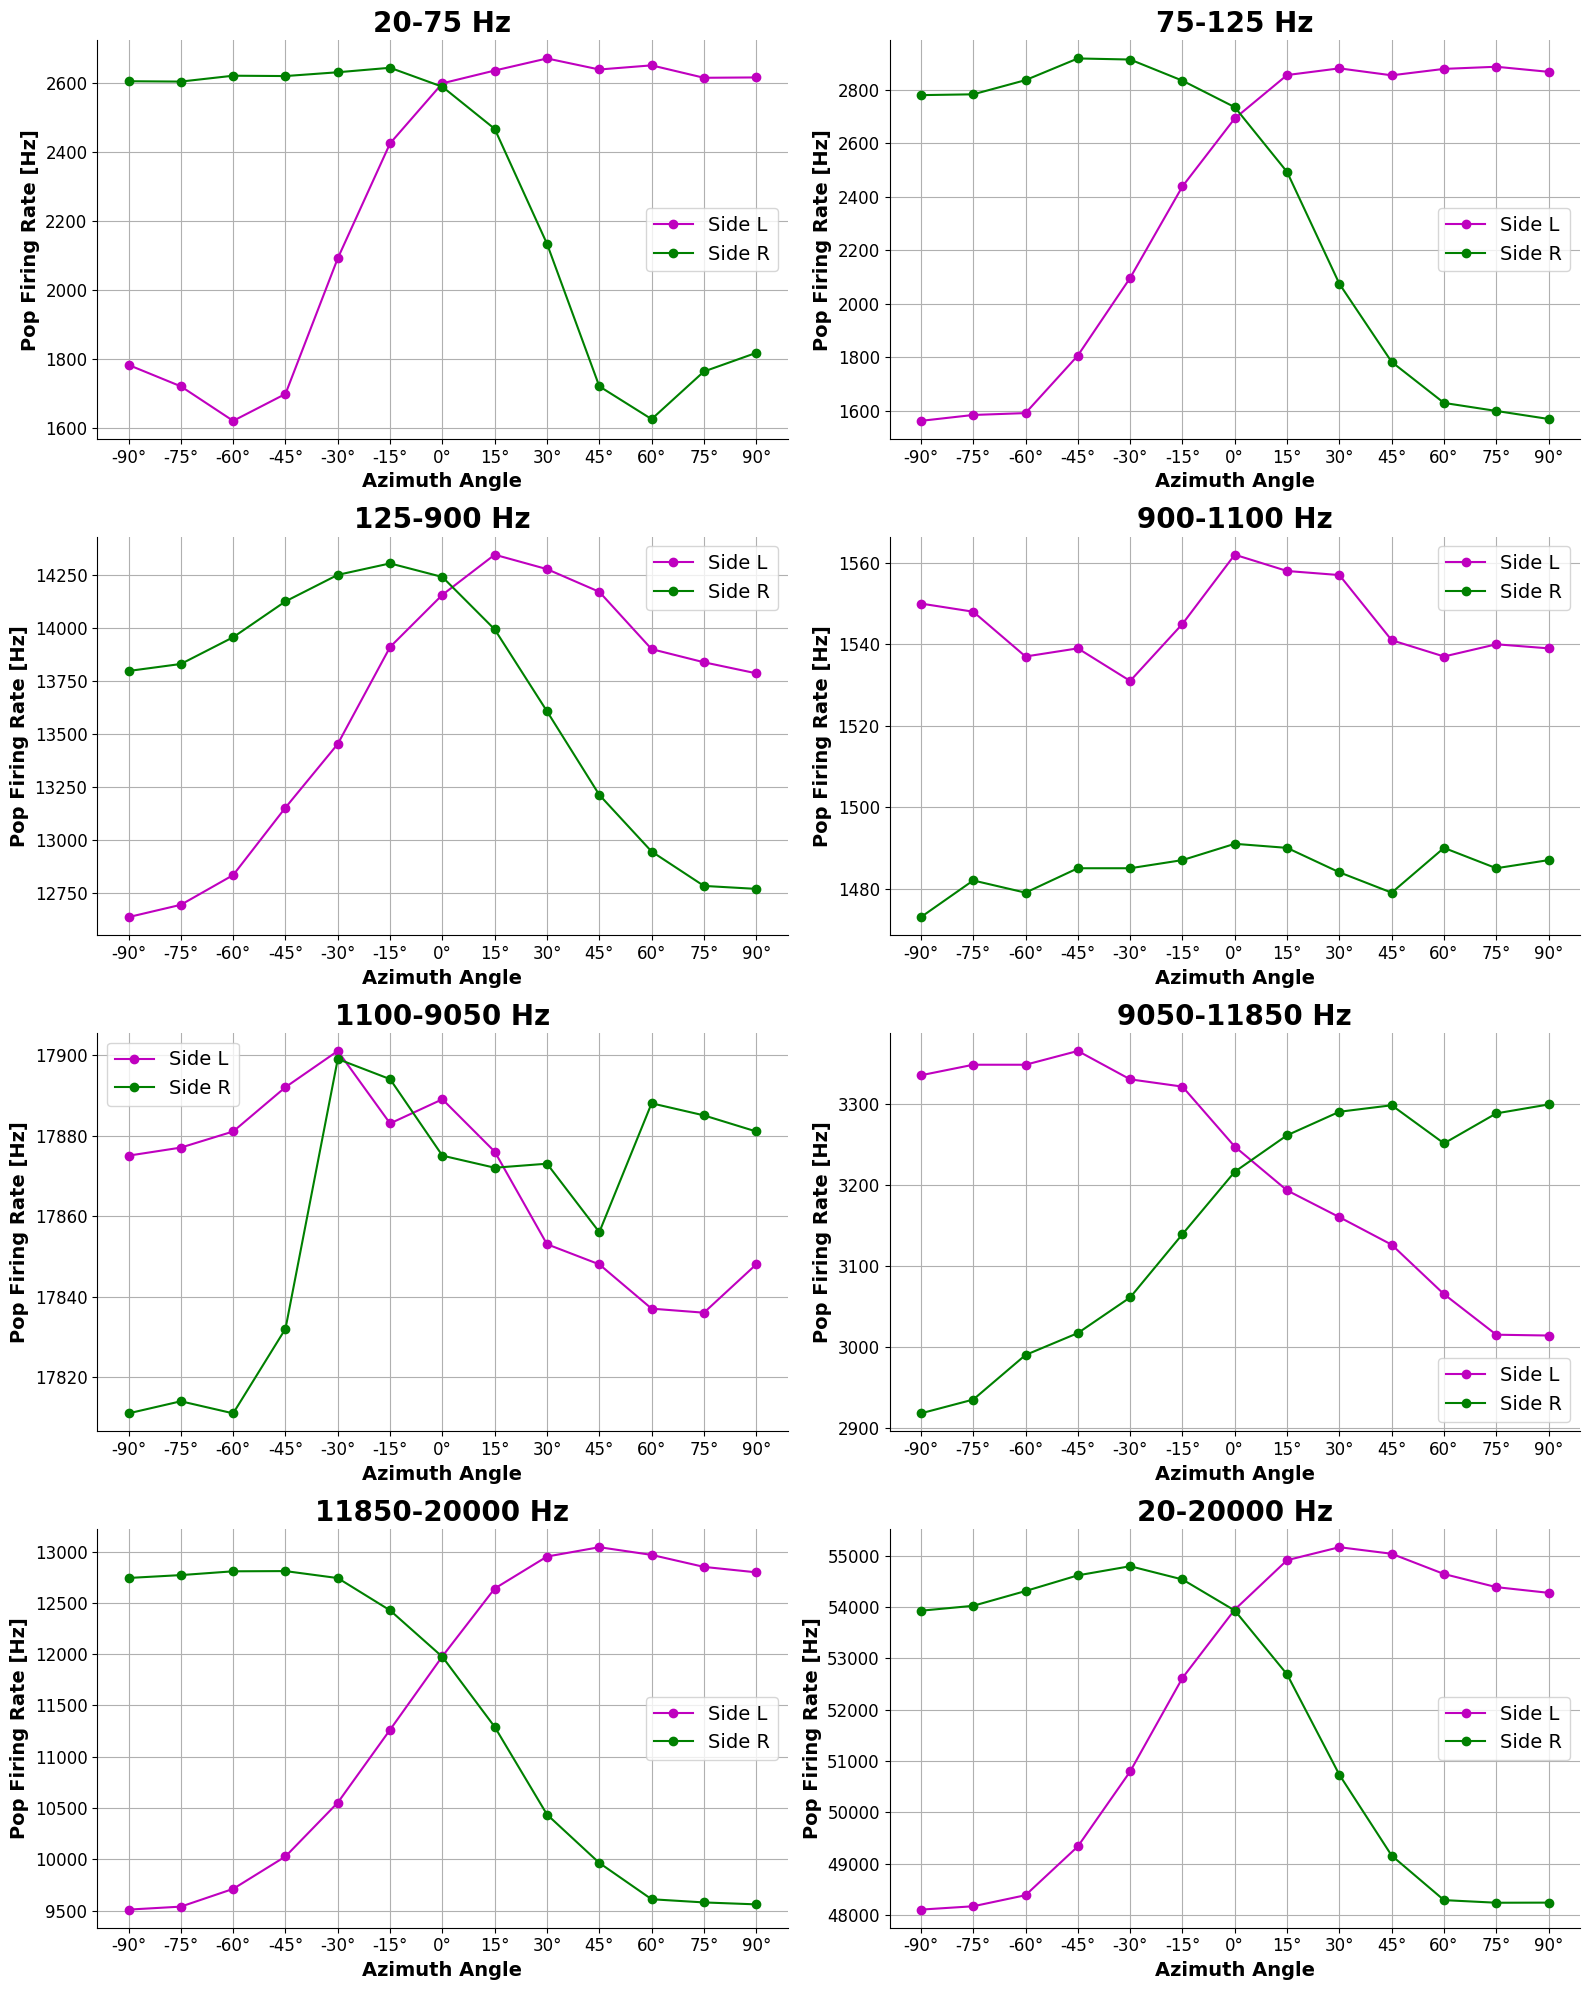

ild_only


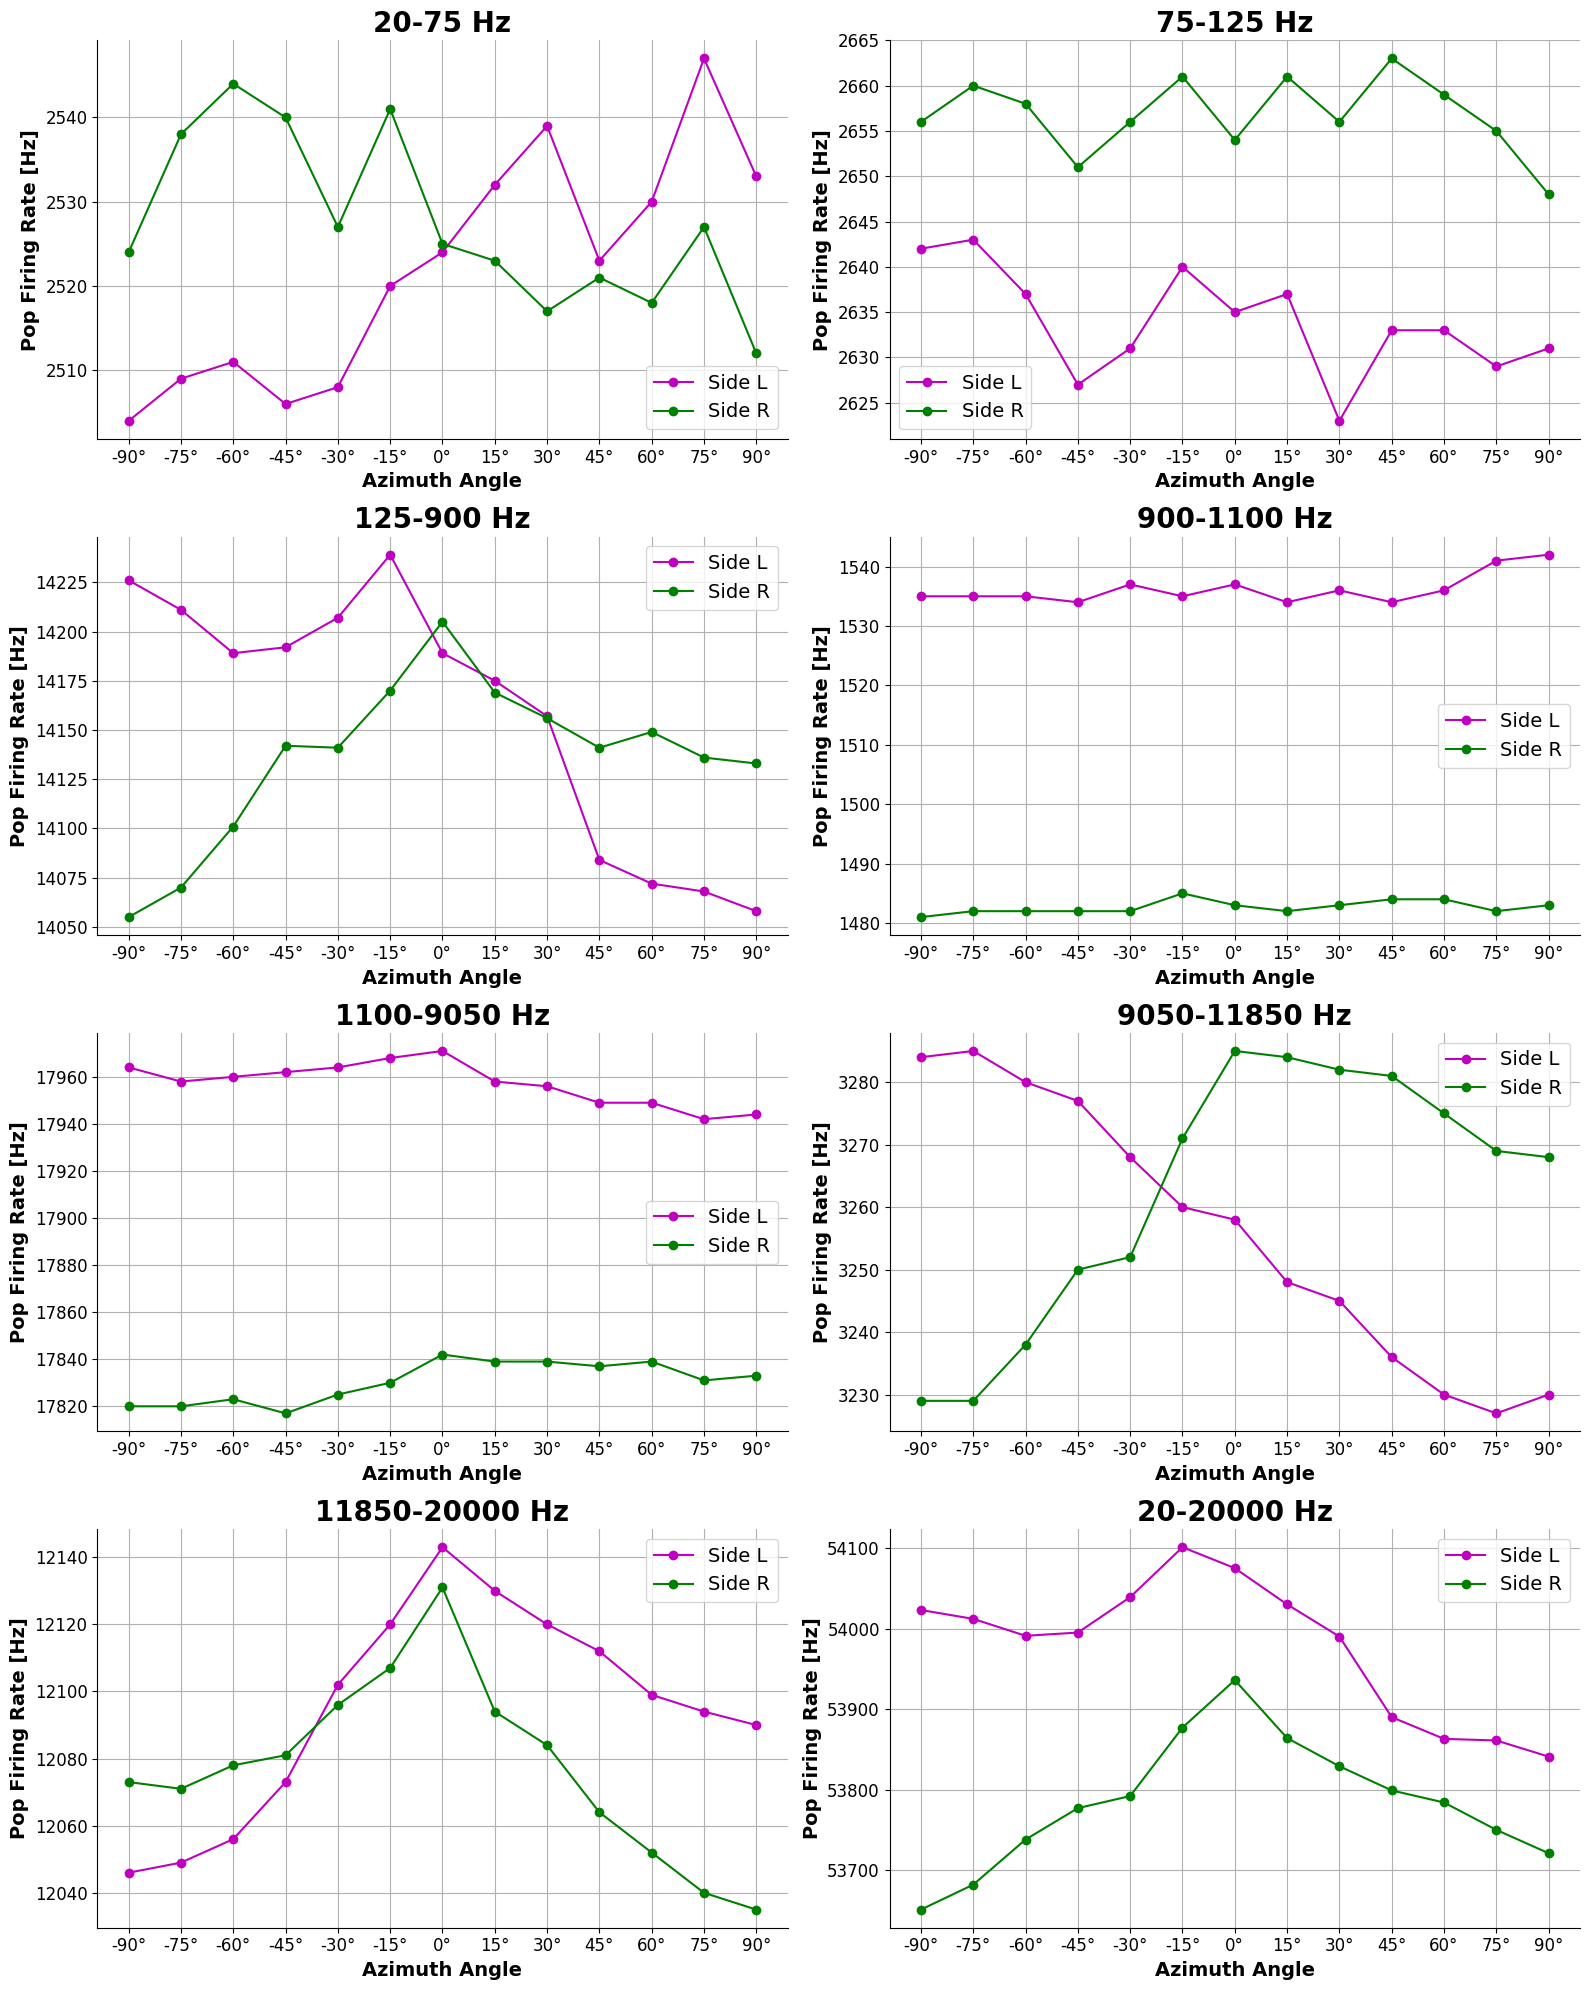

tone_1.kHz 

subject_1


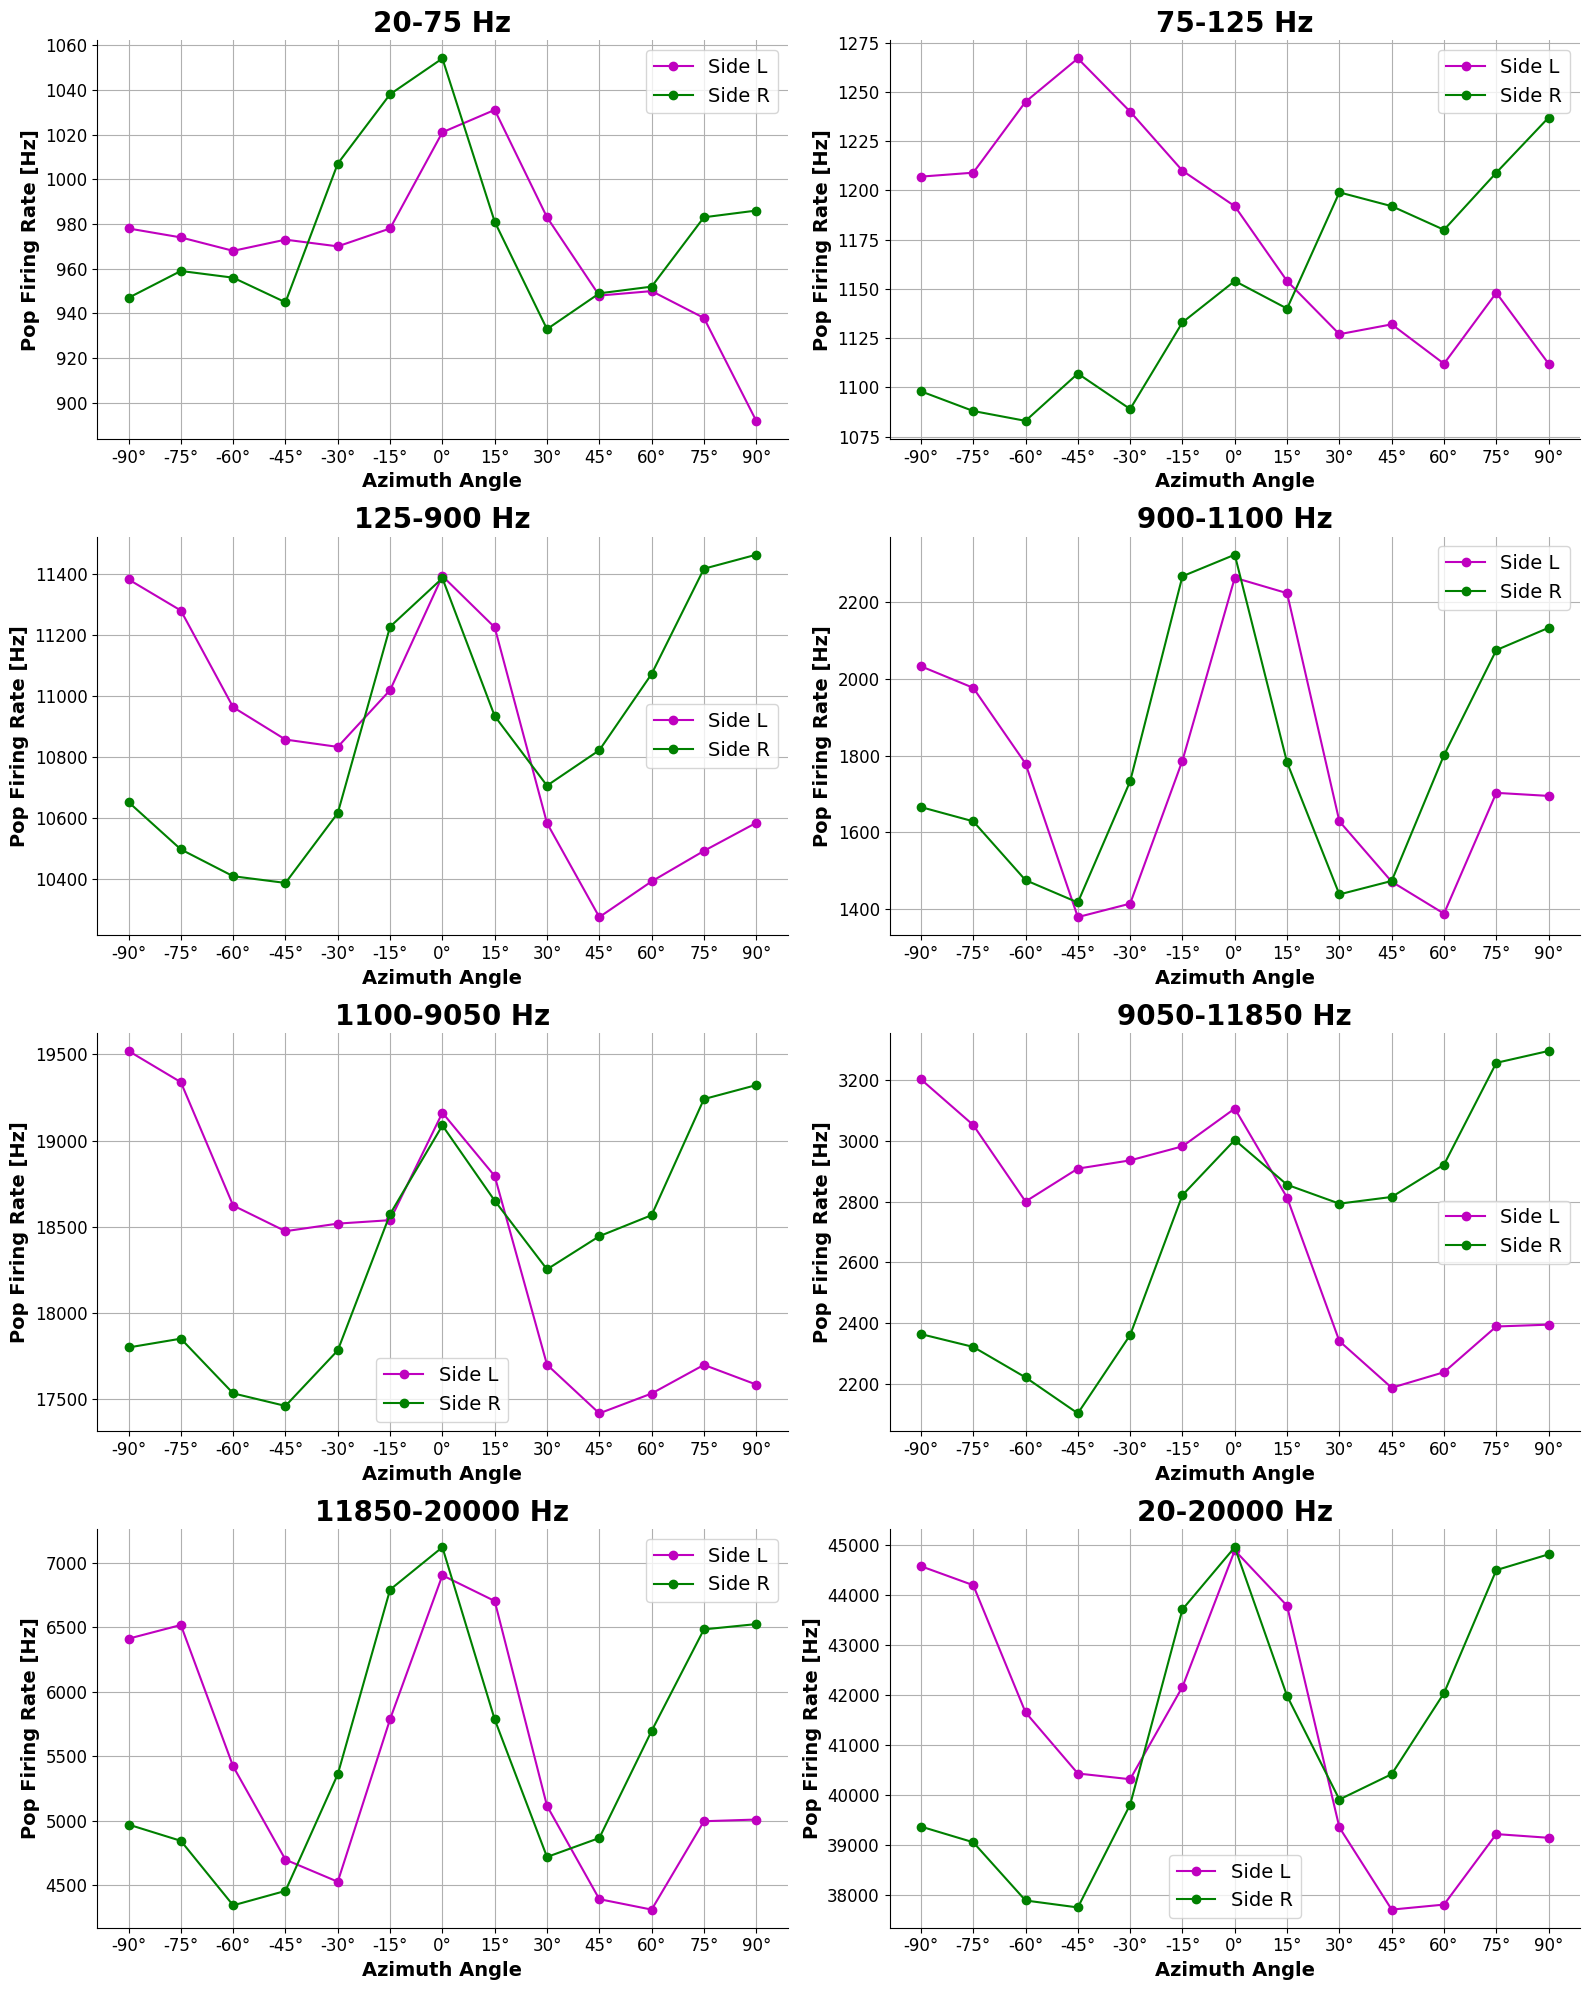

itd_only


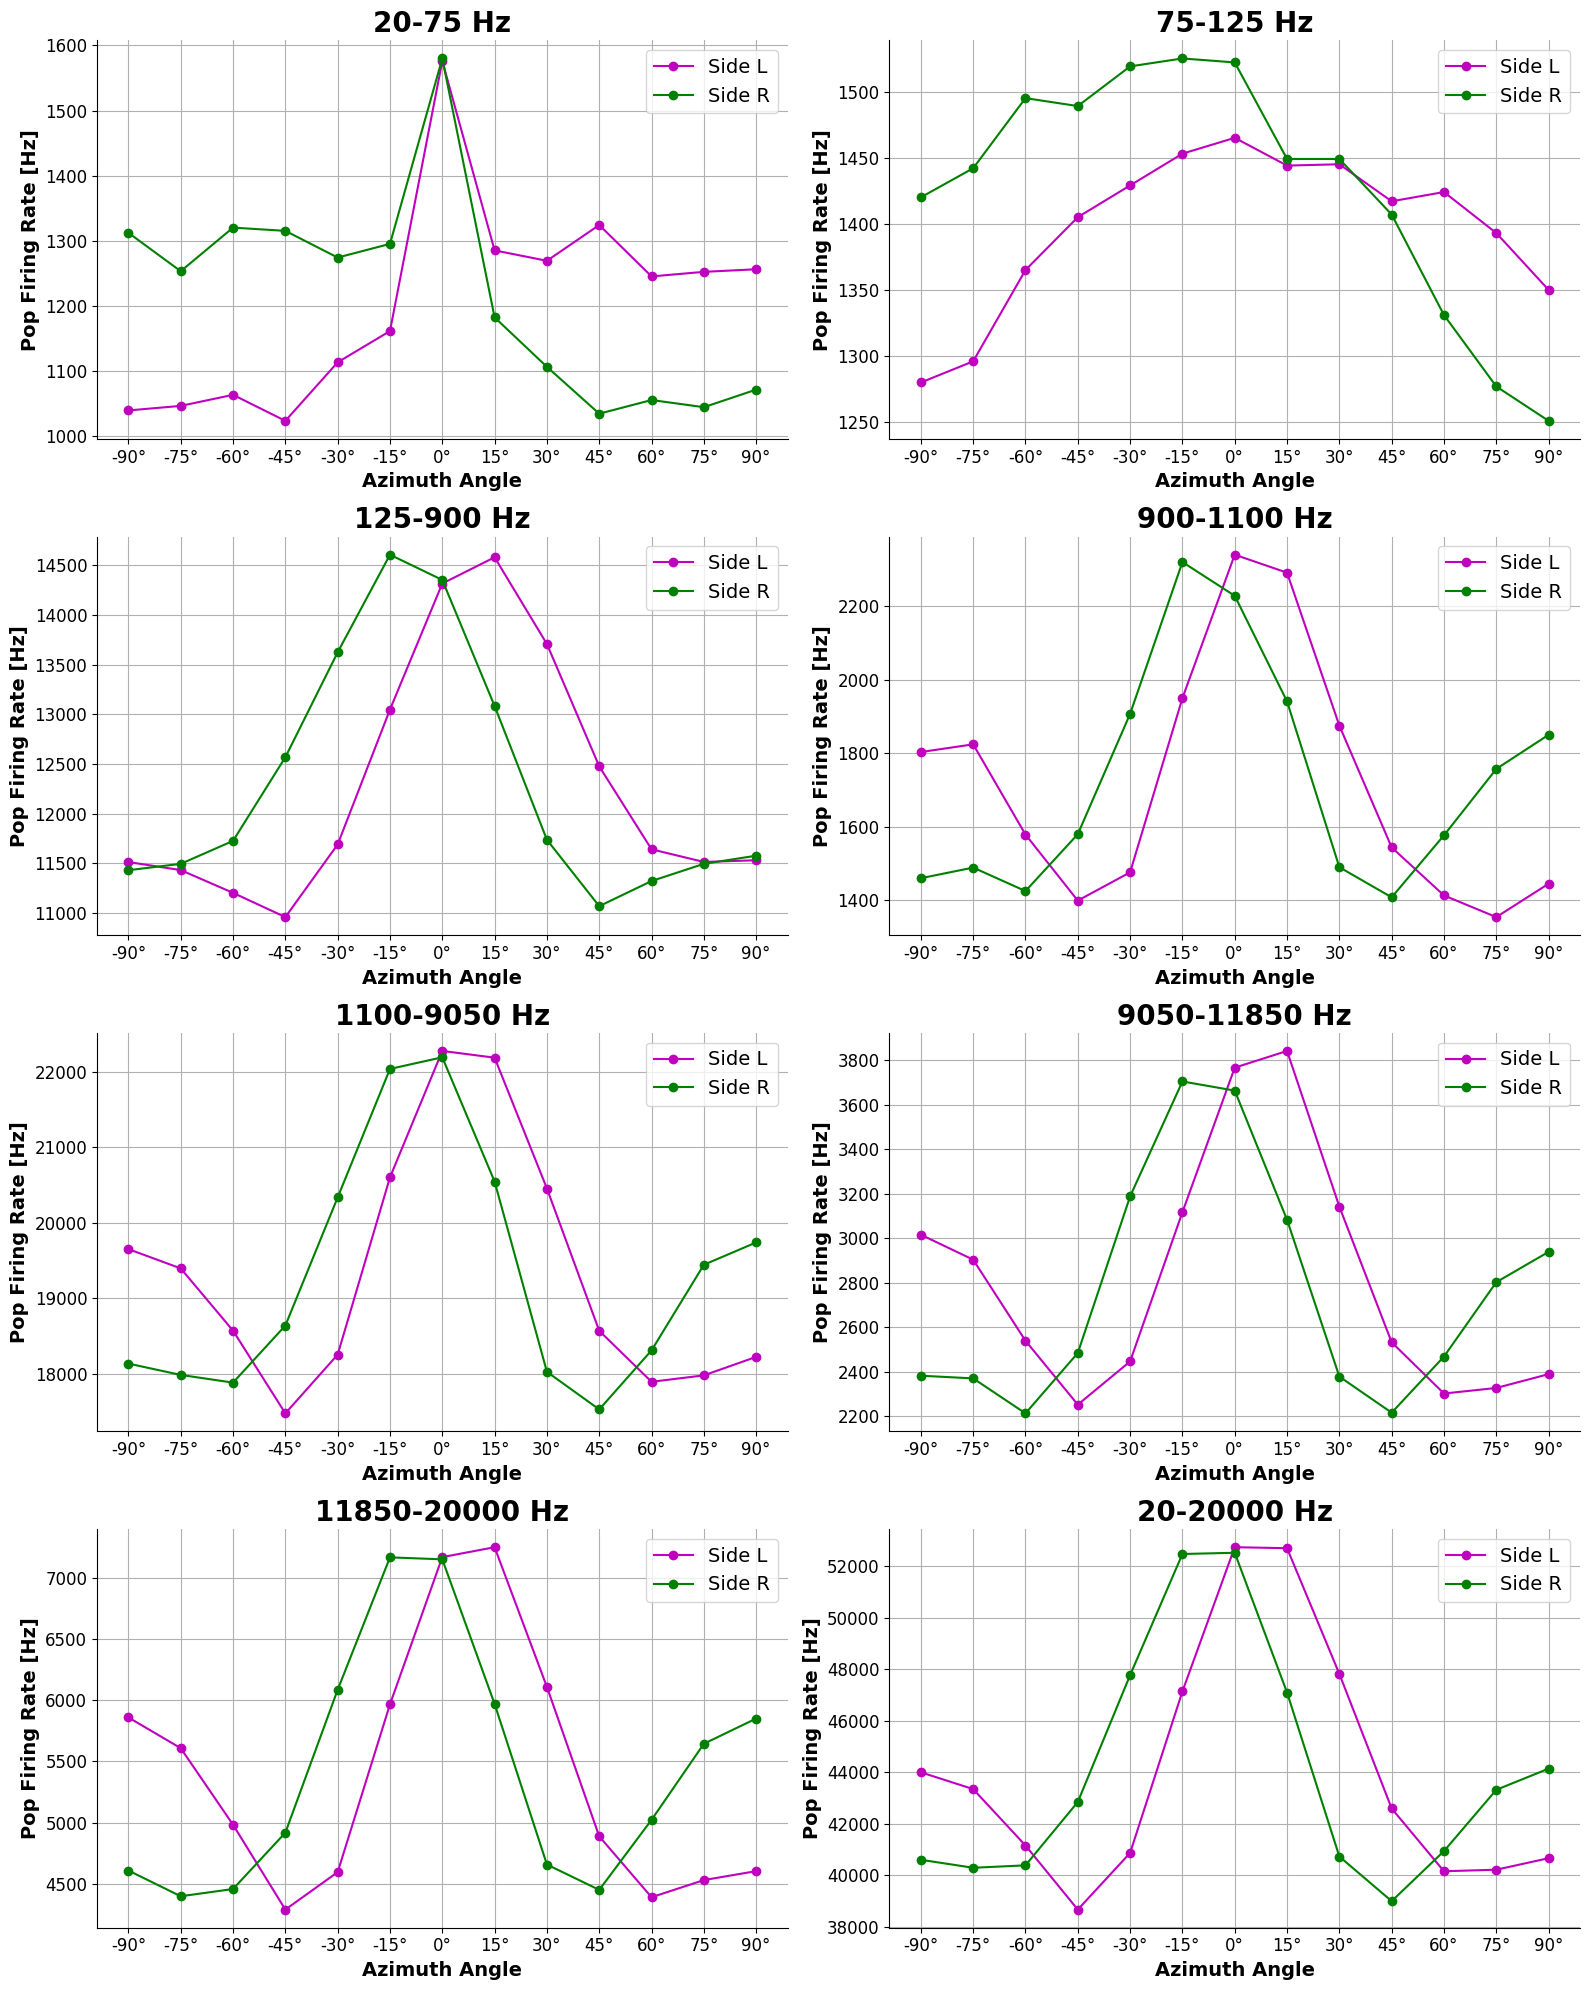

ild_only


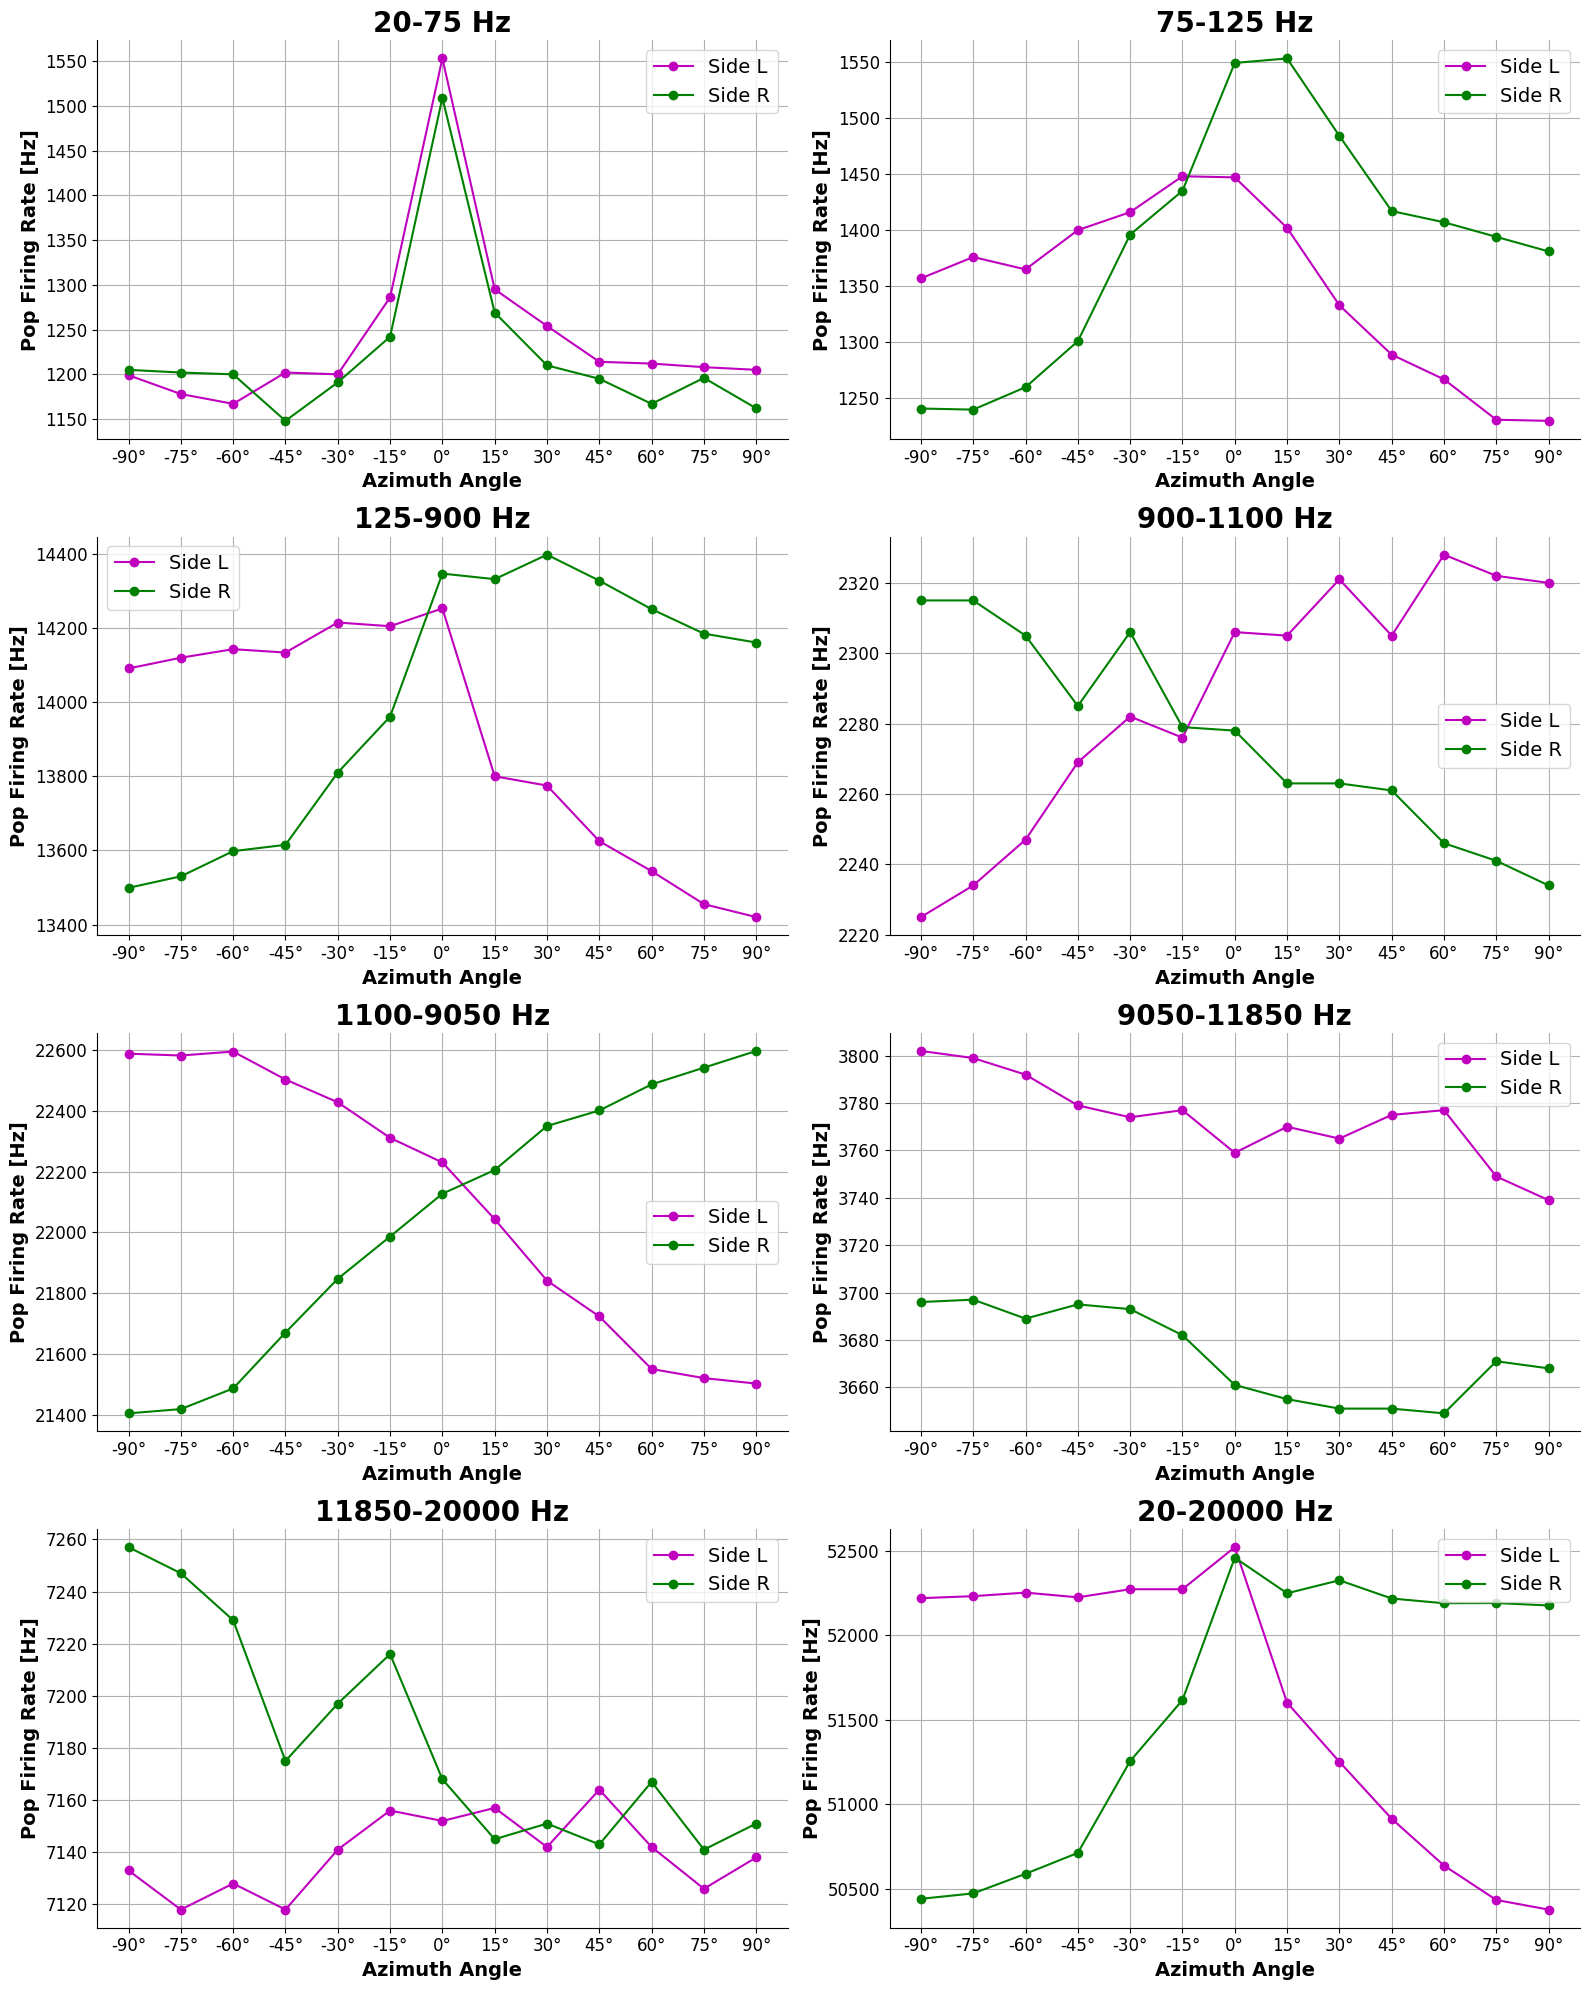

tone_10.kHz 

subject_1


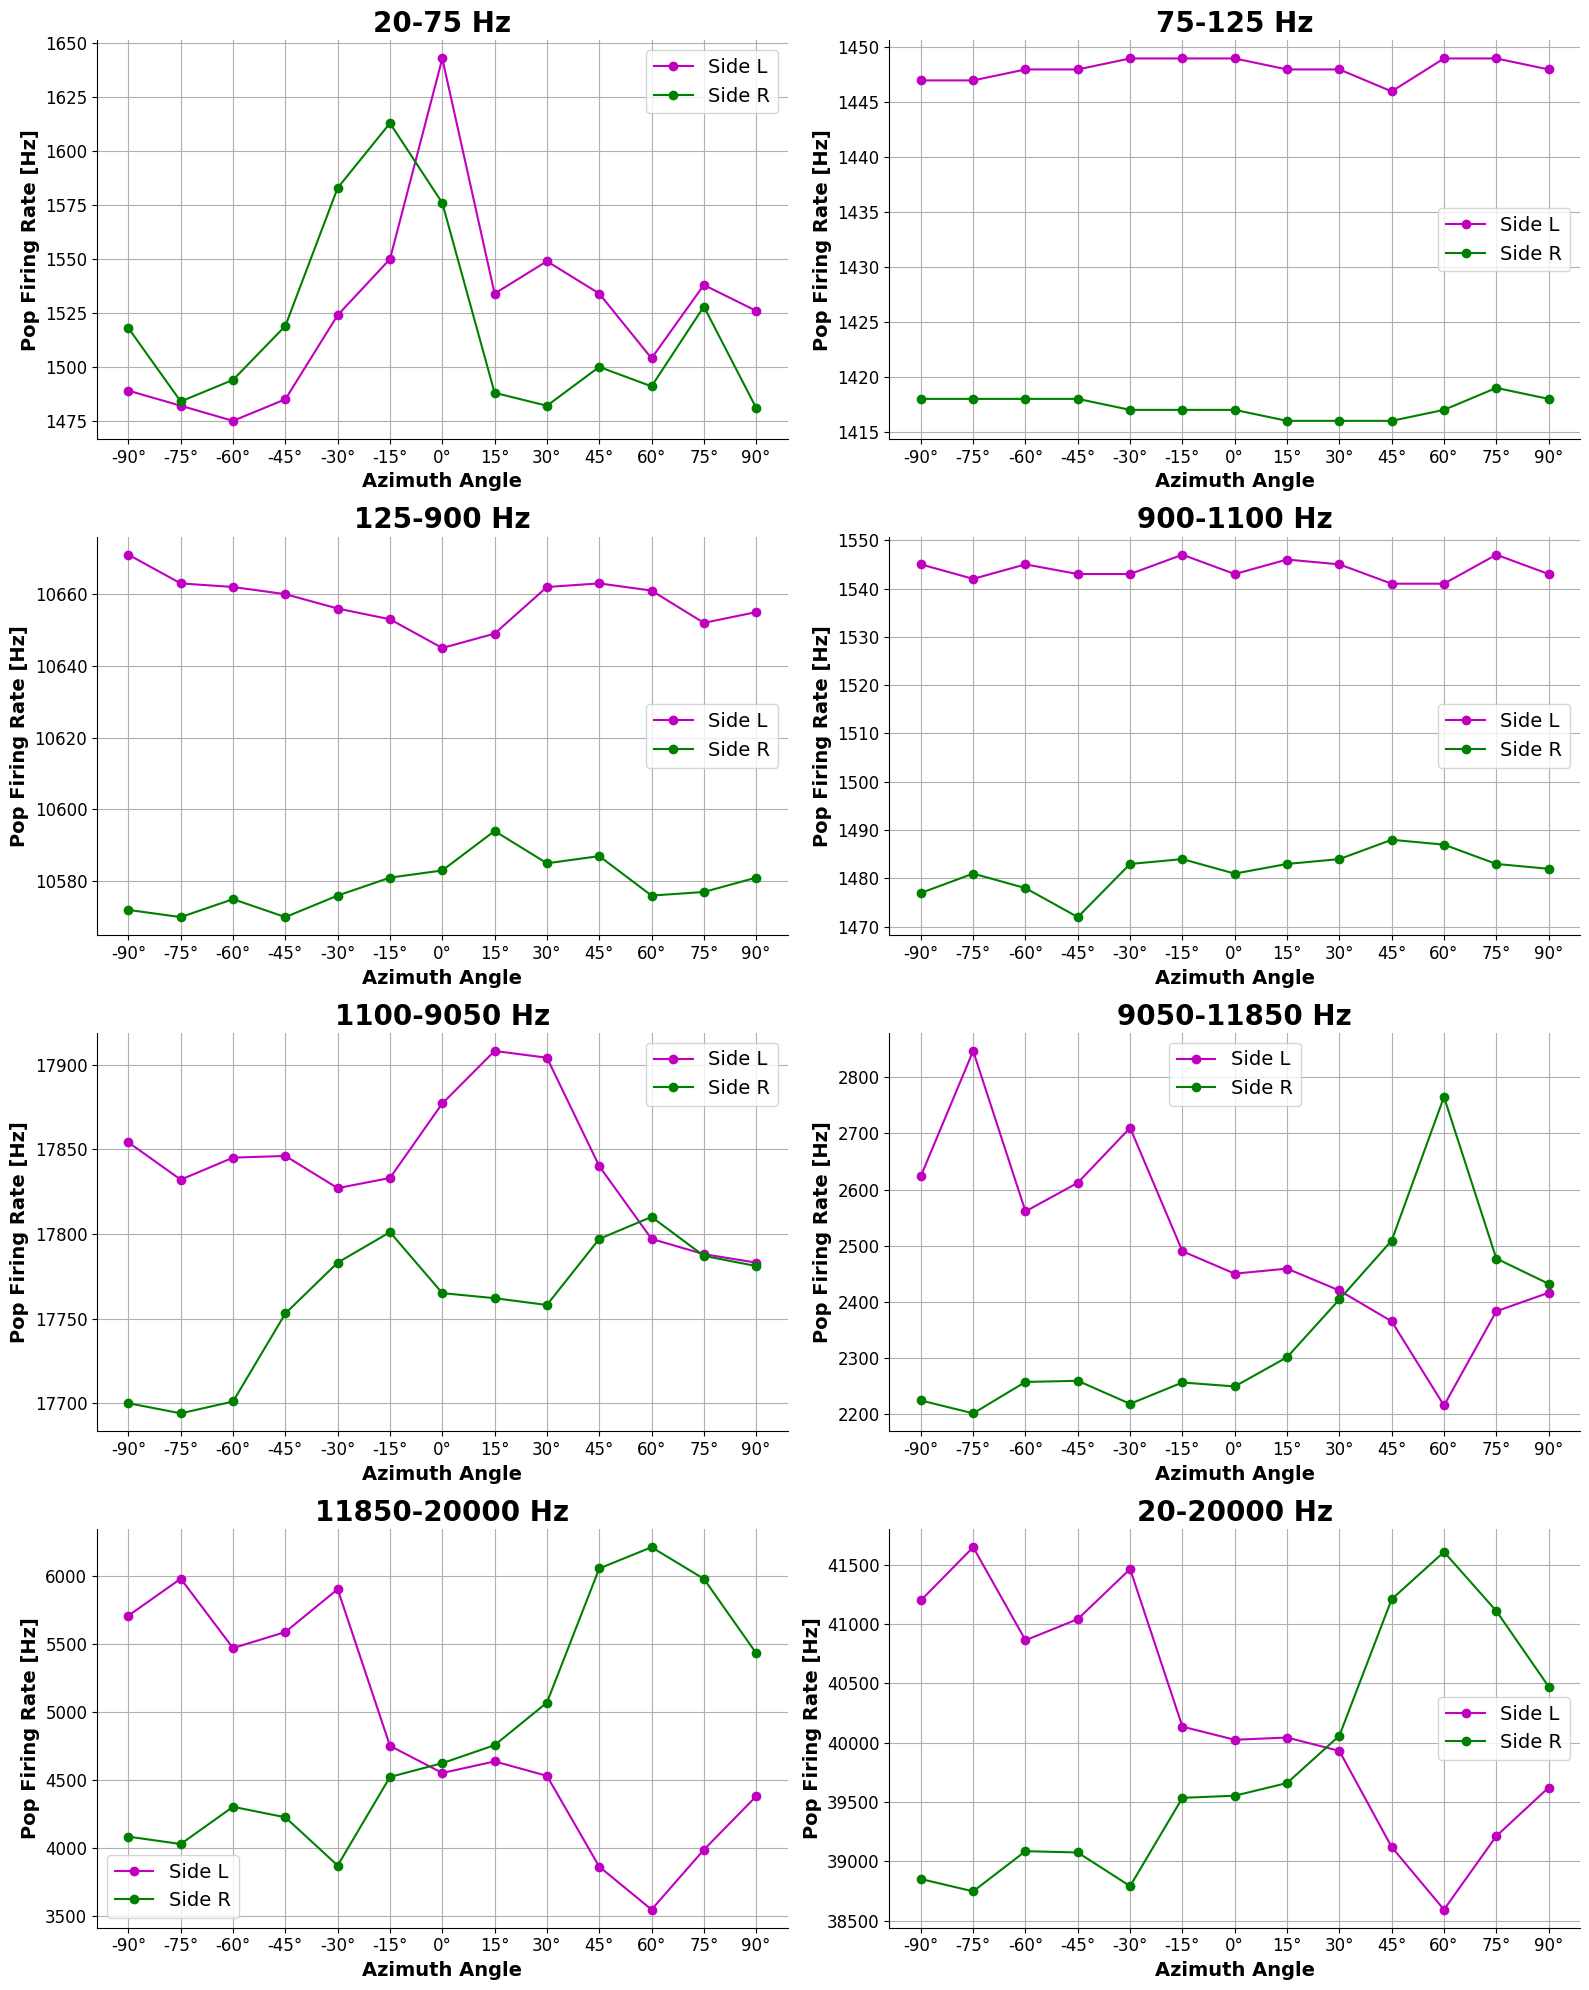

itd_only


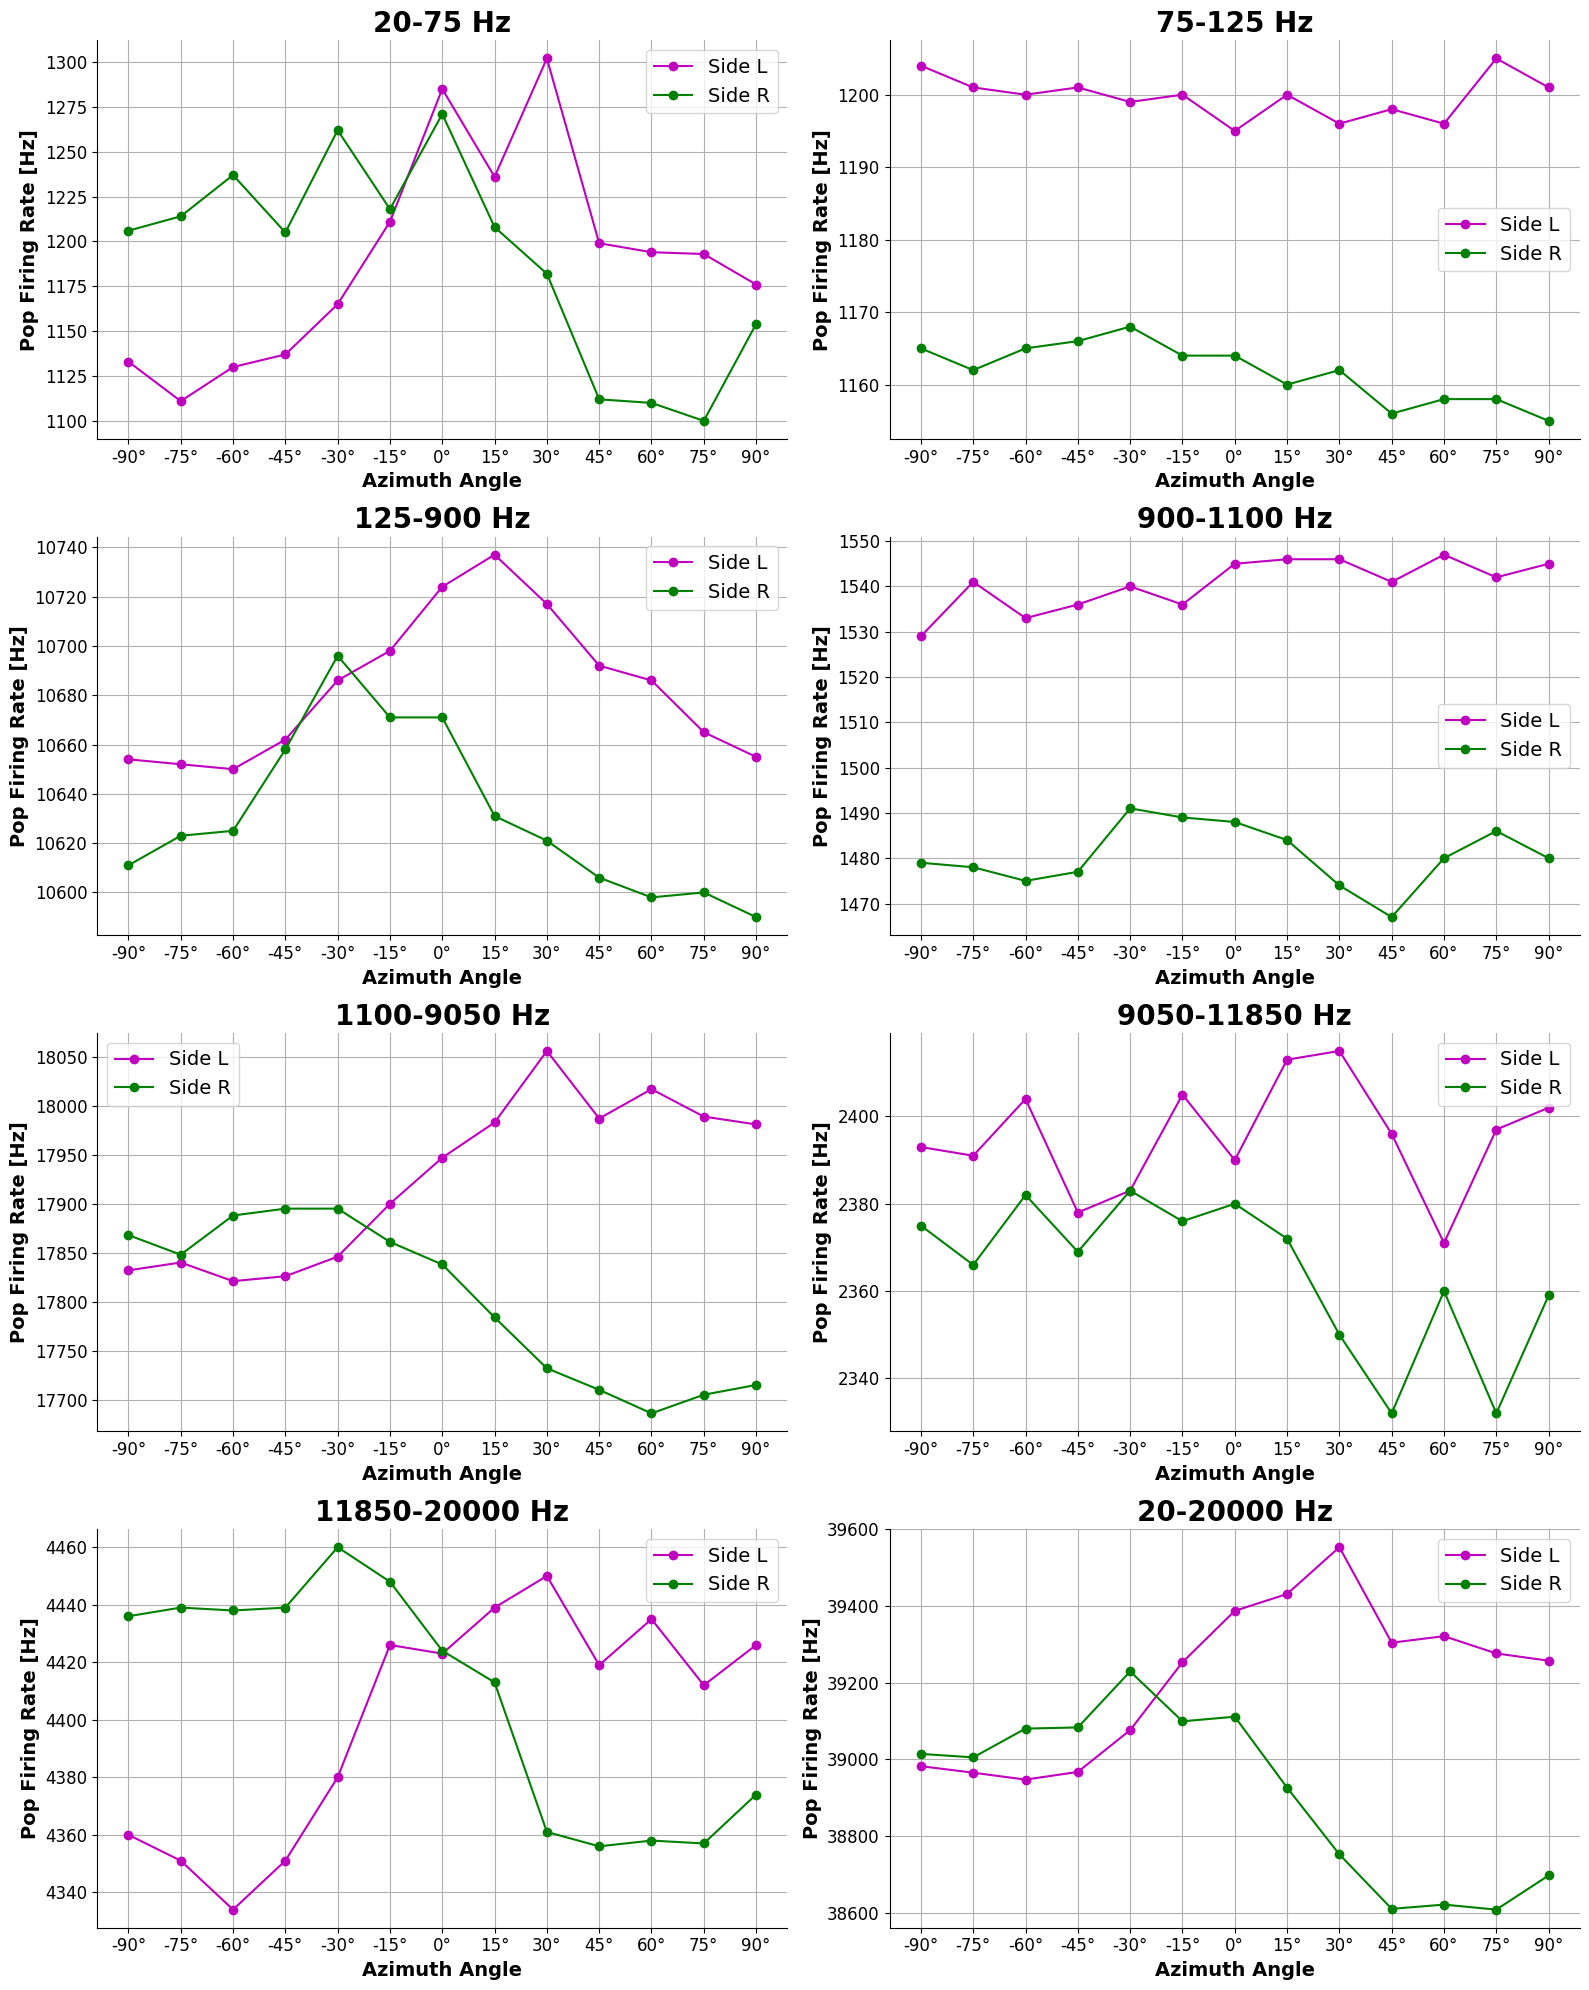

ild_only


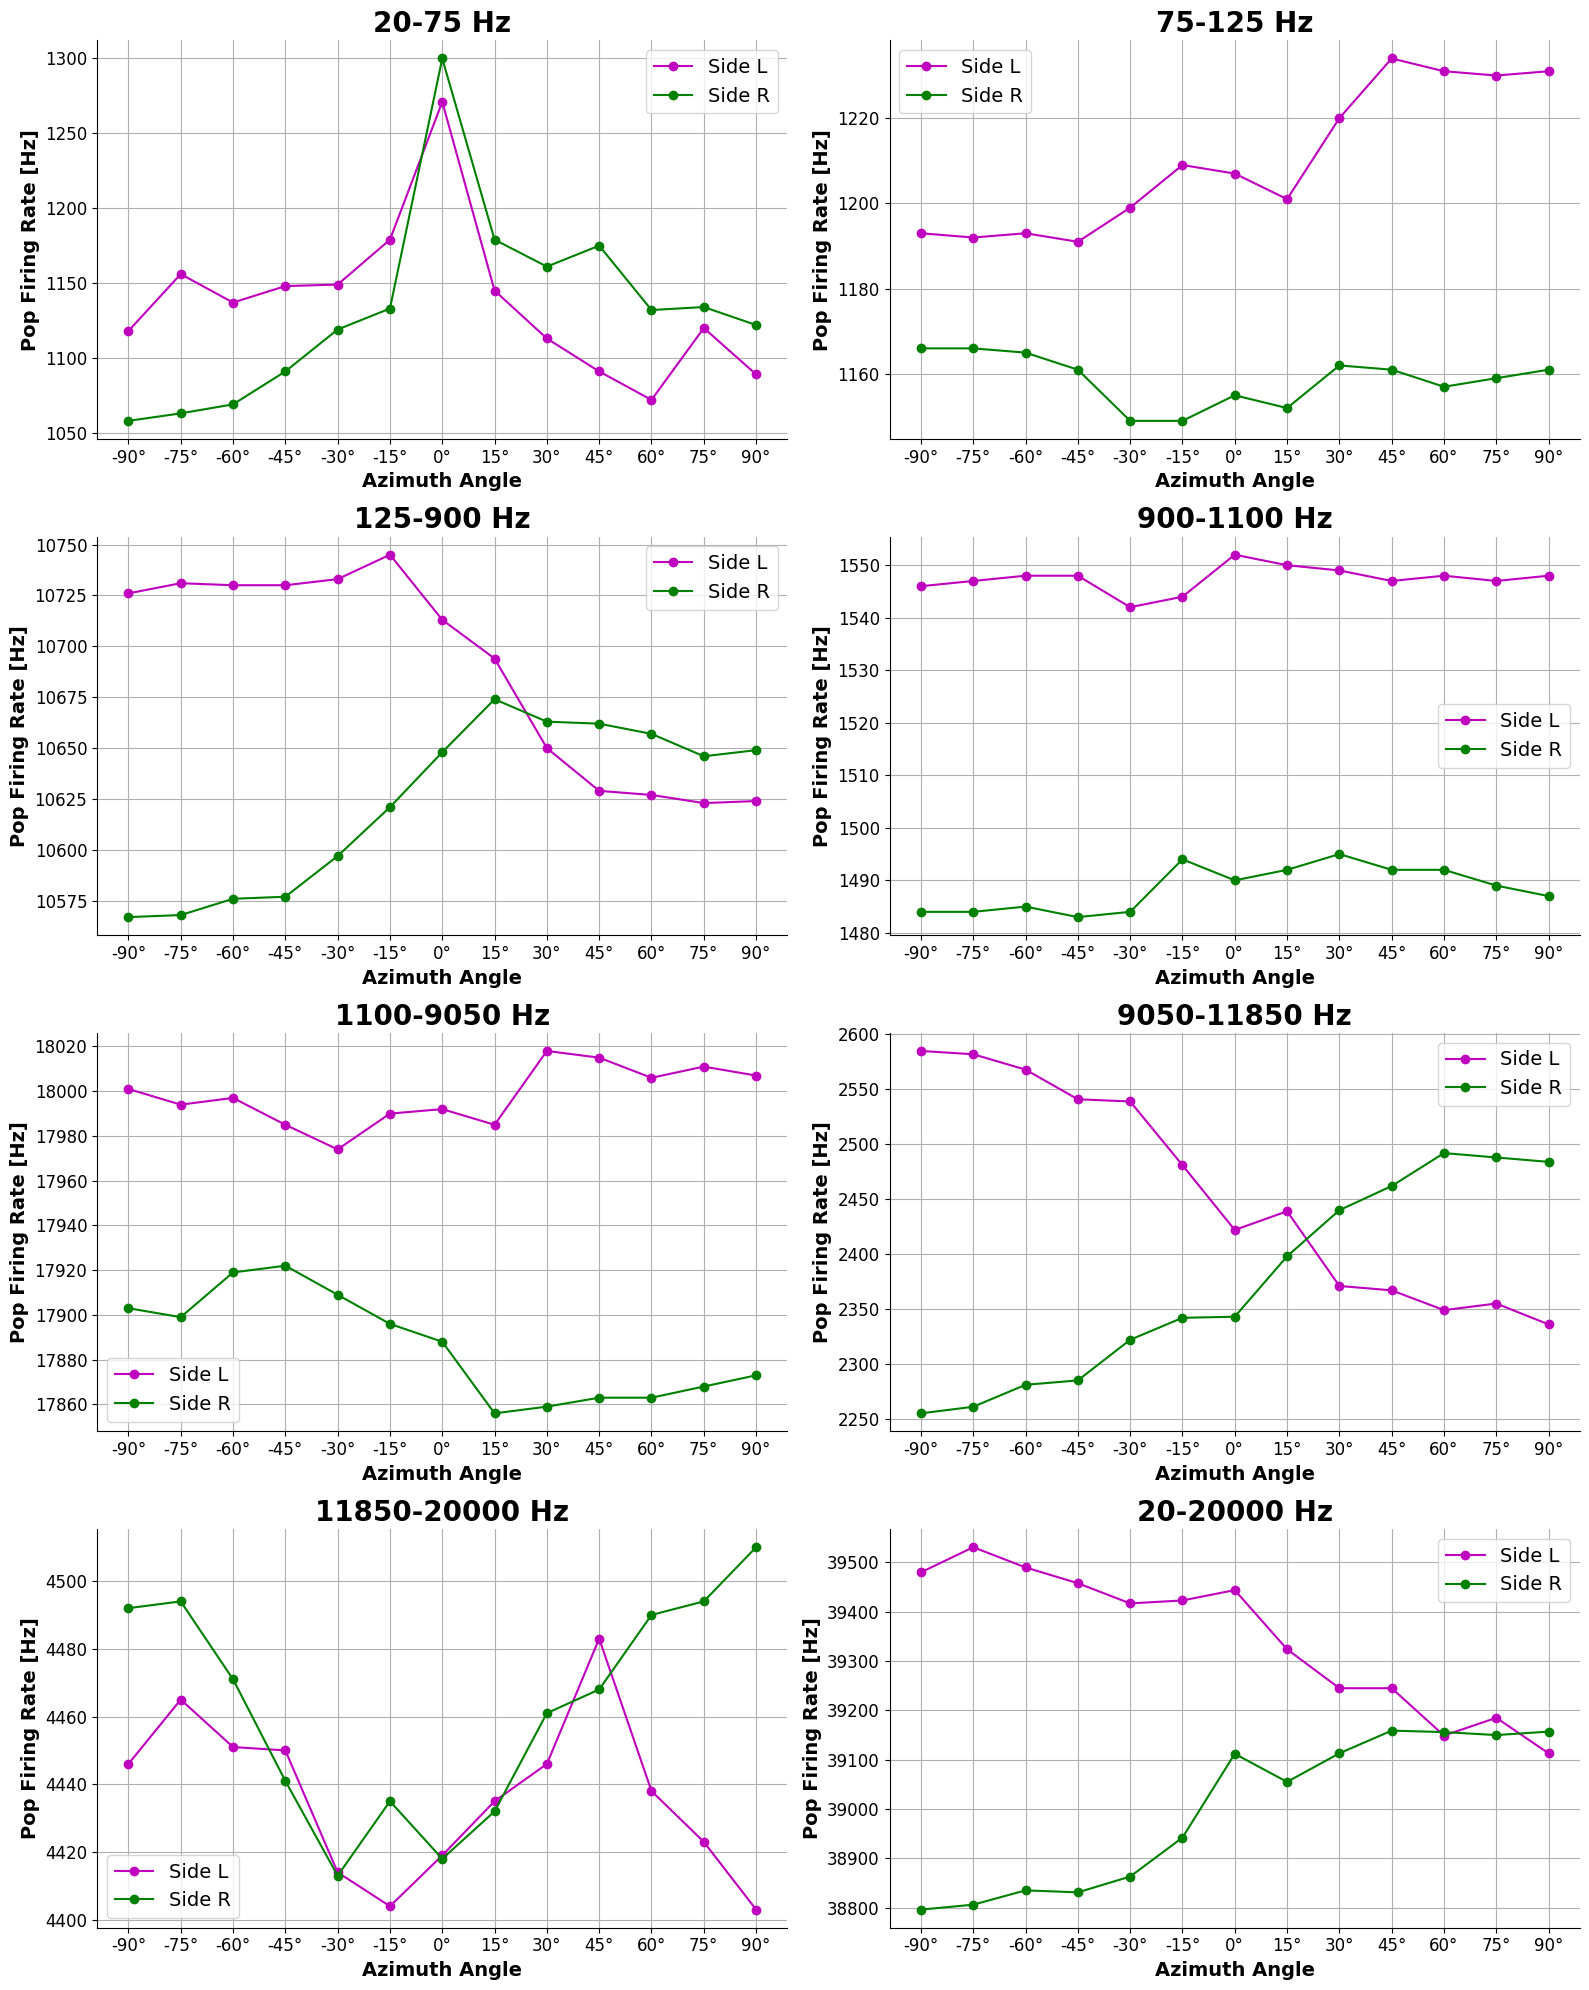

whitenoise 

subject_1


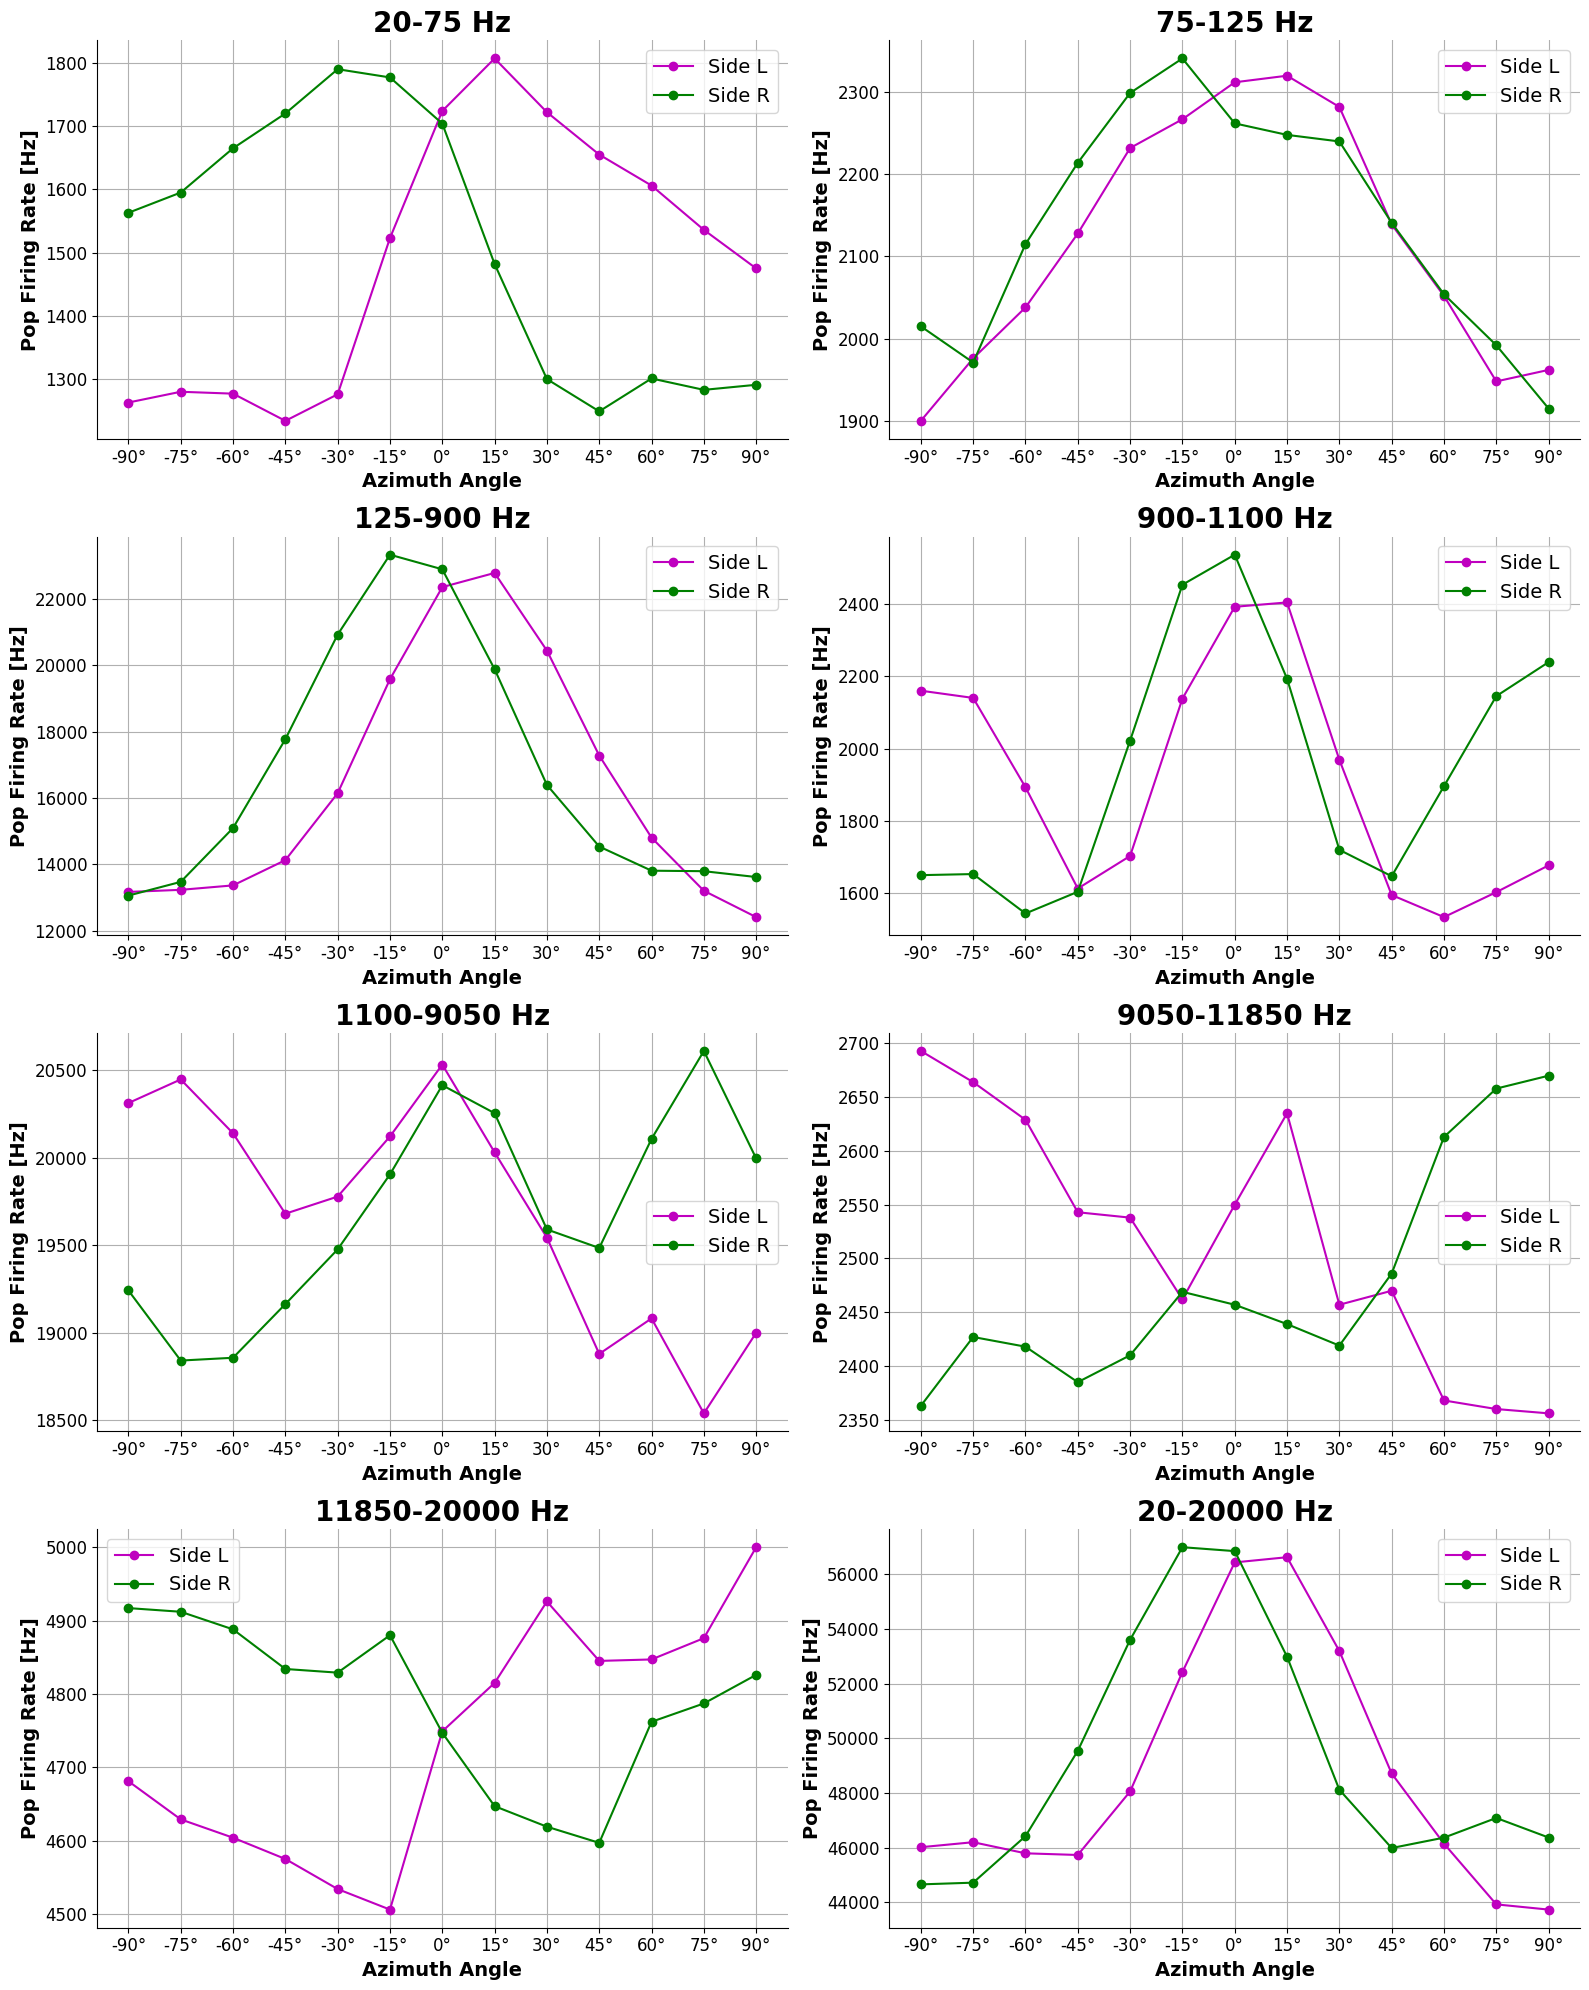

itd_only


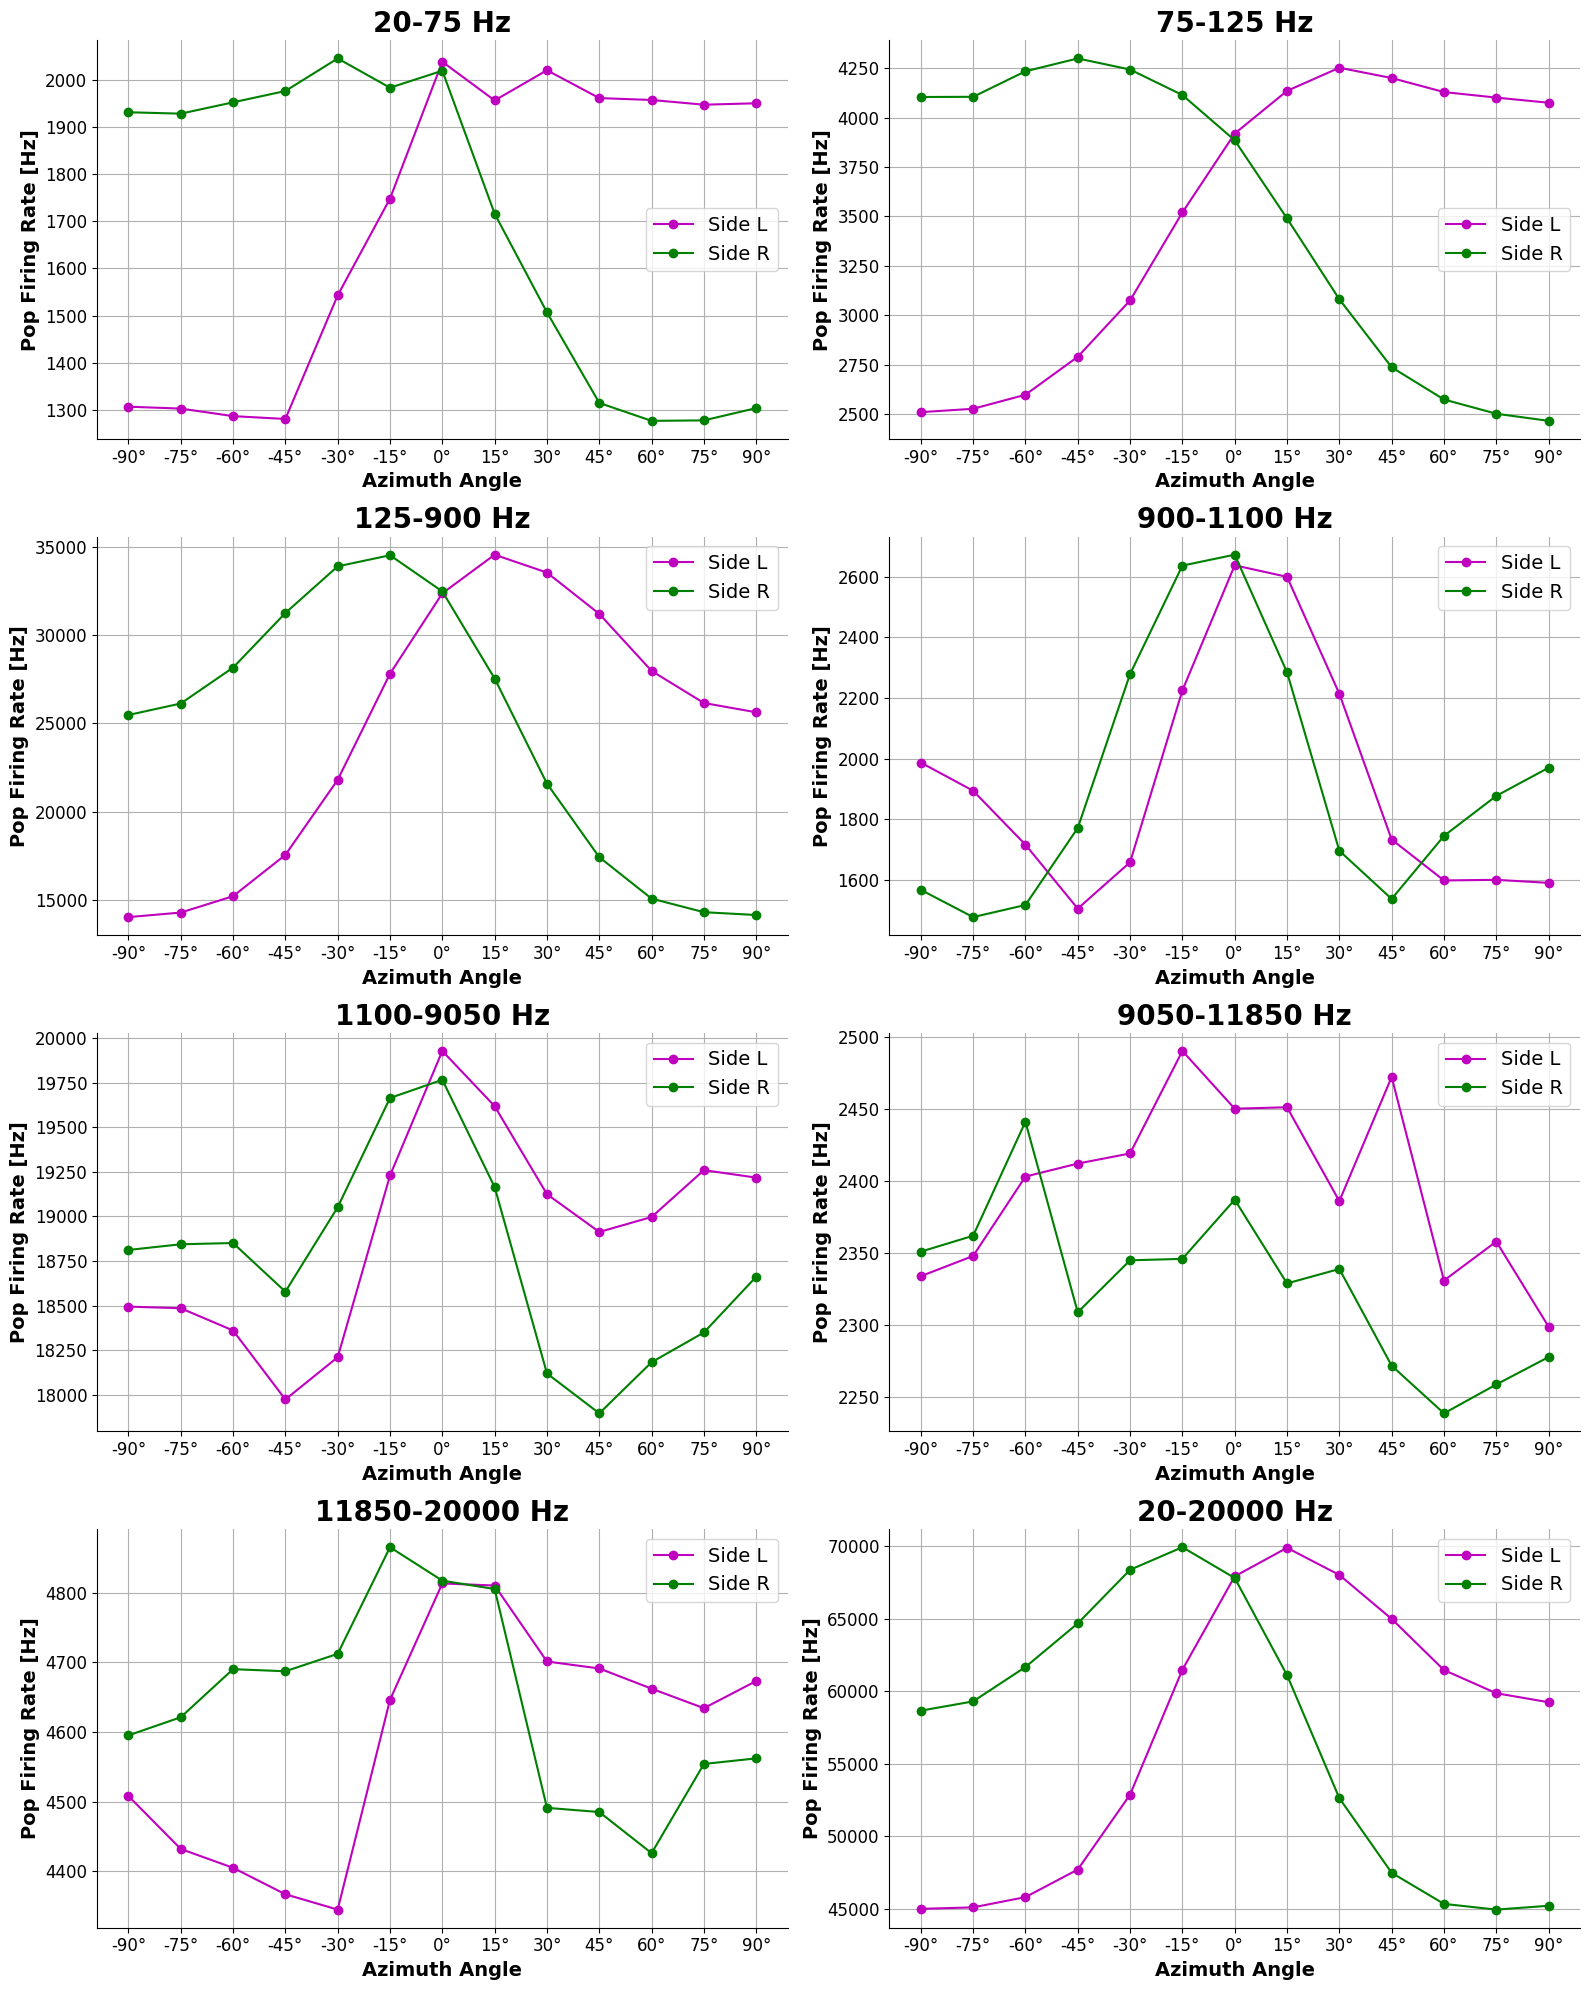

ild_only


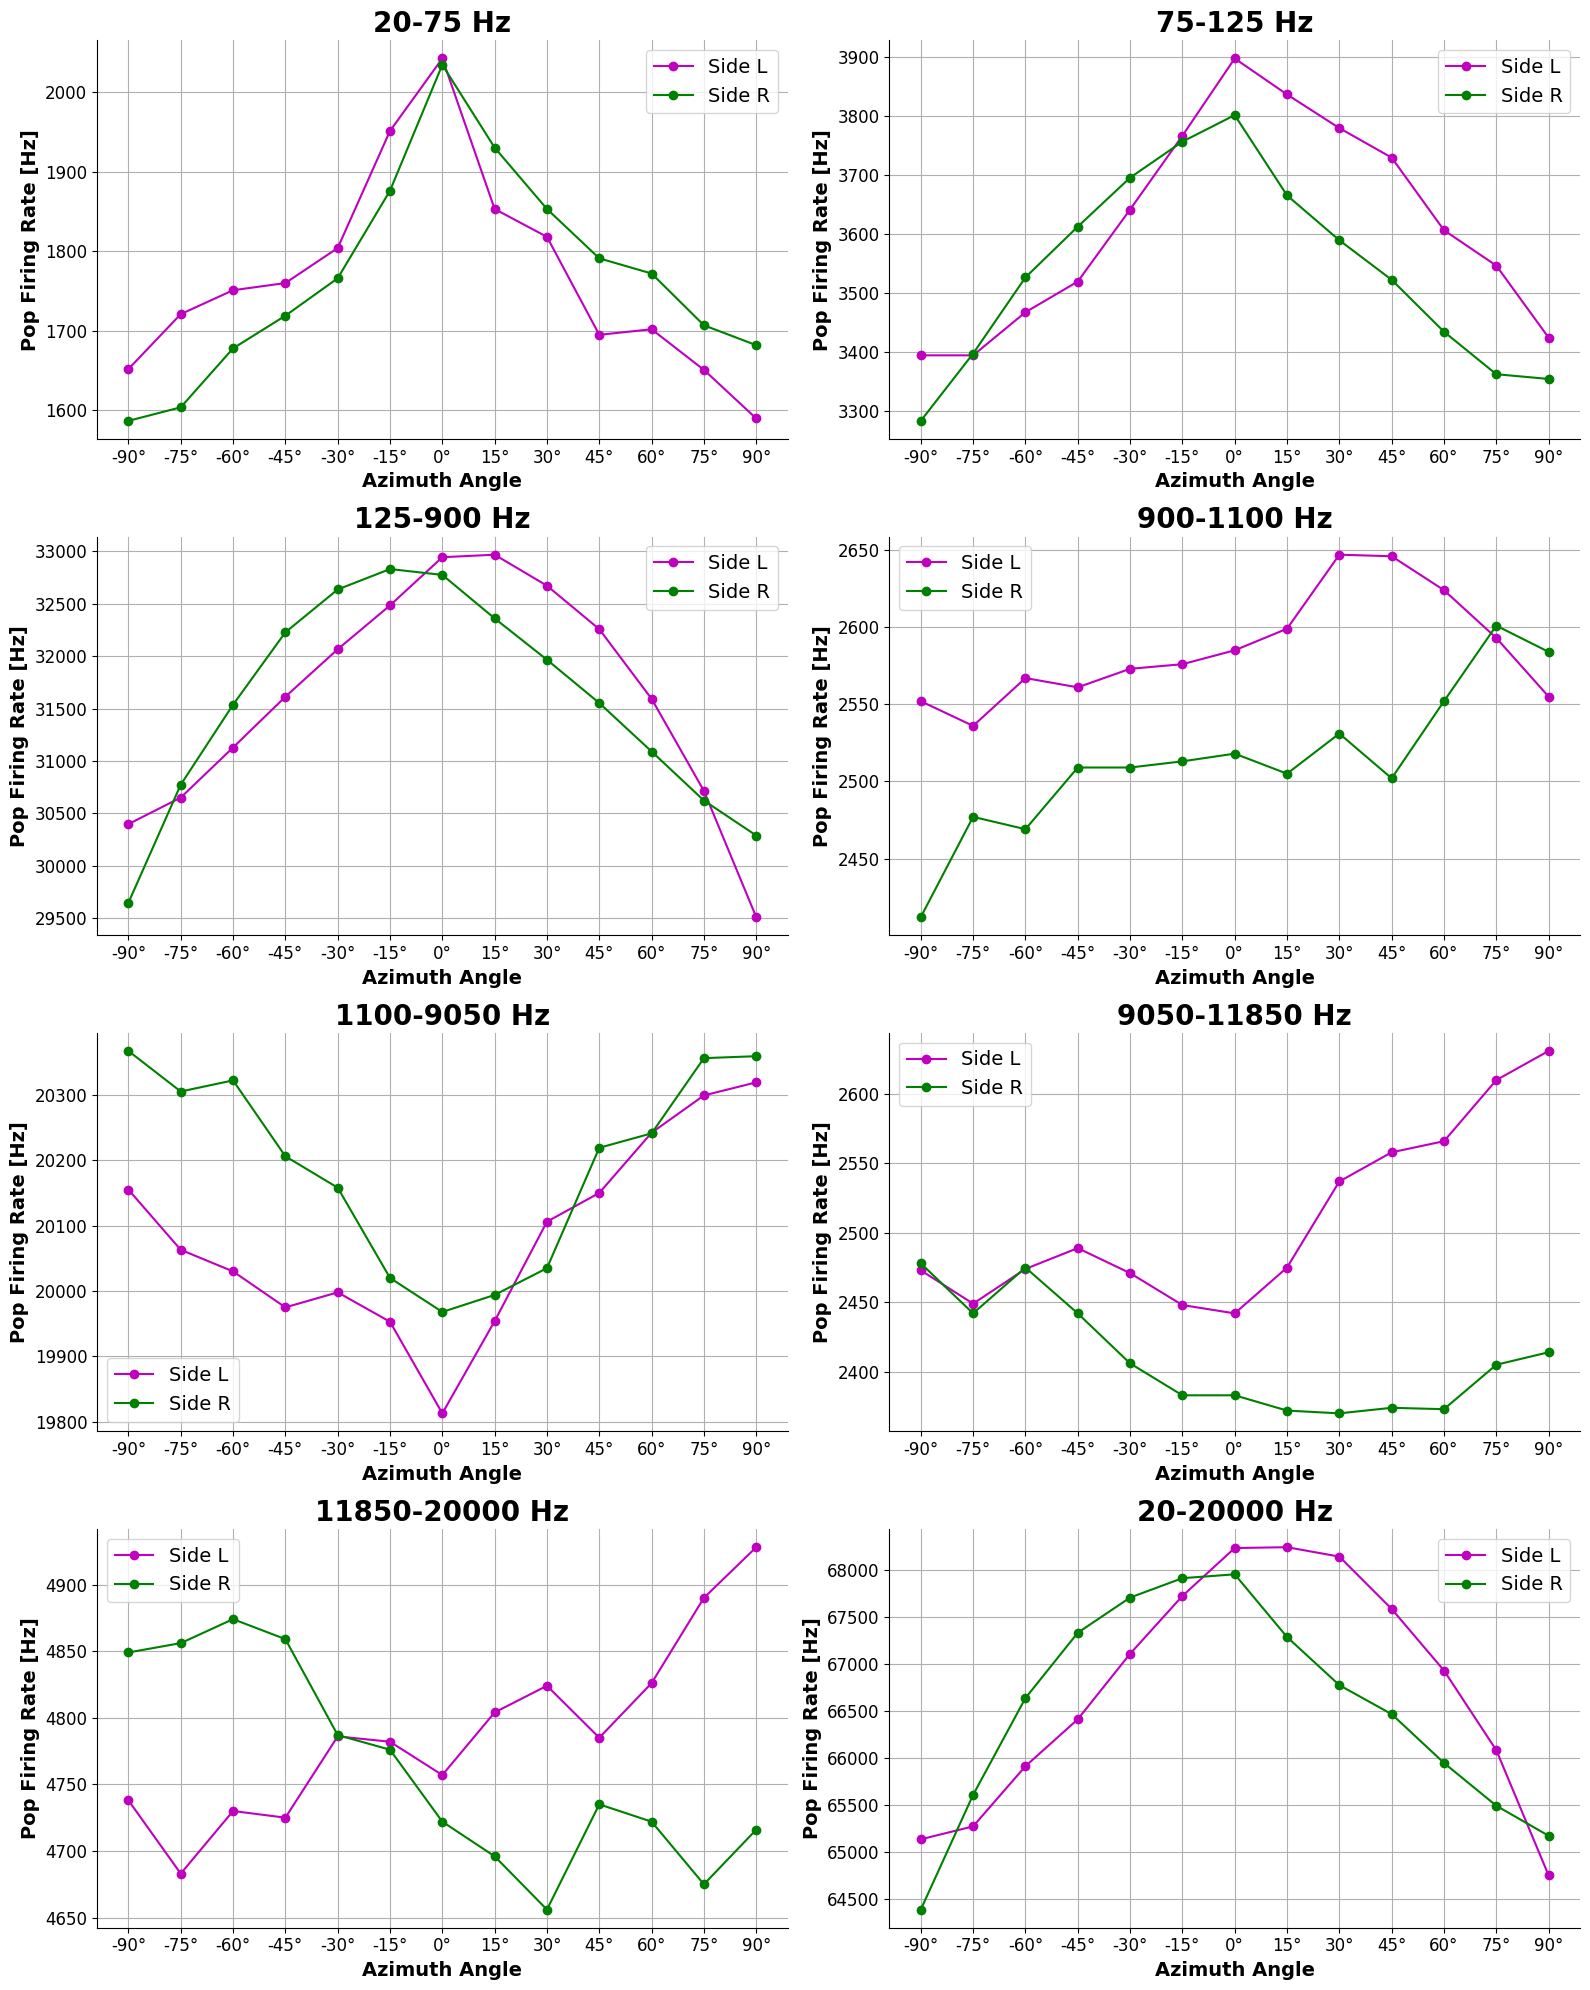

In [ ]:
intervals = [[20,75], [75,125], [125,900], [900,1100], [1100,9050], [9050,11850], [11850, 20000], [20,20000]]

for f in sounds:
    print(f, '\n')
    for cue in cues:
        print(cue)
        title = f'{f}_70dB&TanCarney&{cue}.pic'
        result_path = result_dir + title

        with open(result_path, "rb") as file:
            result = dill.load(file, ignore=True)

        plot_cf_intervals_grid(data=result, intervals=intervals, pop=pop, rate=False)

        del result
        gc.collect()
